In [1]:
# Importações da Biblioteca Padrão
import warnings
import os
from itertools import cycle

# Manipulação e análise de dados
import numpy as np
import pandas as pd

# Visualização de dados
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

# Configuração da seaborn
sns.set(style="whitegrid")
warnings.filterwarnings('ignore') 

# Machine Learning (Aprendizado de Máquina)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    roc_auc_score, 
    accuracy_score, 
    roc_curve, 
    recall_score
)
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE


# Análise Estatística
from scipy.stats import mannwhitneyu, chi2_contingency, kruskal
from statsmodels.stats.proportion import proportions_ztest

# IA Explicável
import shap

# Salvar modelos 
import joblib

## Importação dos dados e tratamento inicial

In [2]:
# Carregamento dos dados 
dados = pd.read_csv('../data/credit_card_churn.csv')

# Visualização o dataset
dados

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  \
0                  39  ...       12691.0                  777   
1                  44  ...        8256.0                  864   
2                  36  ...        3418.0                    0   
3                  34  ...        3313.0                 2517   
4                  21  ...        4716.0                    0   
...               ...  ...           ...                  ...   
10122              40  ...        4003.0                 1851   
10123              25  ...        4277.0                 2186   
10124              36  ...        5409.0                    0   
10125              36  ...        5281.0                    0   
10126              25  ...       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
0                    1.625                  0.061   
1                    3.714                  0.105   
2                    2.333                  0.000   
3                    2.333                  0.760   
4                    2.500                  0.000   
...                    ...                    ...   
10122                0.857                  0.462   
10123                0.683                  0.511   
10124     

In [3]:
# Verificando a existencia de valores nulos 
for i in range(len(dados.columns)):
    print(f'{dados.columns[i]}: {dados[dados.columns[i]].isnull().sum()}')

CLIENTNUM: 0
Attrition_Flag: 0
Customer_Age: 0
Gender: 0
Dependent_count: 0
Education_Level: 0
Marital_Status: 0
Income_Category: 0
Card_Category: 0
Months_on_book: 0
Total_Relationship_Count: 0
Months_Inactive_12_mon: 0
Contacts_Count_12_mon: 0
Credit_Limit: 0
Total_Revolving_Bal: 0
Avg_Open_To_Buy: 0
Total_Amt_Chng_Q4_Q1: 0
Total_Trans_Amt: 0
Total_Trans_Ct: 0
Total_Ct_Chng_Q4_Q1: 0
Avg_Utilization_Ratio: 0
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1: 0
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2: 0


In [4]:
# Removendo variáveis que não serão utilizadas
dados.drop(columns = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                      'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
           inplace=True,errors = 'ignore')


In [5]:
# Verificando balanceamento do dataset
contagem = dados['Attrition_Flag'].value_counts()
percentual = dados['Attrition_Flag'].value_counts(normalize=True)*100

# Cria dataFrame para visualização dos resultados
tabela = pd.DataFrame({
    'Quantidade': contagem,
    'Percentual (%)' : percentual.round(2)
})

# Renomeando indices
tabela.index=['Ativo', 'Saiu']

# Exibe a tabela formatada
tabela

Quantidade  Percentual (%)
Ativo        8500           83.93
Saiu         1627           16.07

**Tradução e Padronização das Variáveis**

Realizei a tradução das colunas e categorias para o português com três objetivos principais:
- **Clareza** - Facilitar o entendimento por equipes brasileiras
- **Praticidade** - Permitir o uso direto em gráficos e apresentações
- **Alinhamento** - Padronizar com o vocabulário do mercado financeiro nacional

Essa padronização torna a análise mais intuitiva para:
- Tomadores de decisão
- Equipes de produtos e CRM
- Apresentações executivas
- Documentação de projetos

Mantive apenas siglas consolidadas no mercado (como CRM) e termos técnicos sem tradução exata, sempre priorizando a compreensão imediata.

In [6]:
# Tradução dos nomes das colunas 
mapeamento_colunas = {
    'CLIENTNUM': 'id_cliente',
    'Attrition_Flag': 'evasao_cliente', 
    'Customer_Age': 'idade', 
    'Gender': 'genero', 
    'Dependent_count': 'qtde_dependentes',
    'Education_Level': 'escolaridade', 
    'Marital_Status': 'estado_civil', 
    'Income_Category': 'faixa_renda', 
    'Card_Category': 'categoria_cartao',
    'Months_on_book': 'meses_como_cliente', 
    'Total_Relationship_Count': 'total_produtos', 
    'Months_Inactive_12_mon': 'meses_inativos_12m',
    'Contacts_Count_12_mon': 'contatos_12m', 
    'Credit_Limit' : 'limite_credito', 
    'Total_Revolving_Bal': 'saldo_rotativo',
    'Avg_Open_To_Buy': 'credito_disponivel_medio', 
    'Total_Amt_Chng_Q4_Q1': 'variacao_valor_transacoes_Q4_Q1', 
    'Total_Trans_Amt': 'valor_total_transacoes',
    'Total_Trans_Ct': 'qtde_total_transacoes', 
    'Total_Ct_Chng_Q4_Q1': 'variacao_qtde_transacoes_Q4_Q1', 
    'Avg_Utilization_Ratio': 'taxa_utilizacao_media'
    }

# Aplicando o mapeamento
dados.rename(columns = mapeamento_colunas, inplace=True)

# Verificação
dados.columns

Index(['id_cliente', 'evasao_cliente', 'idade', 'genero', 'qtde_dependentes',
       'escolaridade', 'estado_civil', 'faixa_renda', 'categoria_cartao',
       'meses_como_cliente', 'total_produtos', 'meses_inativos_12m',
       'contatos_12m', 'limite_credito', 'saldo_rotativo',
       'credito_disponivel_medio', 'variacao_valor_transacoes_Q4_Q1',
       'valor_total_transacoes', 'qtde_total_transacoes',
       'variacao_qtde_transacoes_Q4_Q1', 'taxa_utilizacao_media'],
      dtype='object')

In [7]:
# Dicionário de mapeamento para tradução/transformação de valores categóricos
mapeamentos = {
    'escolaridade': {'Unknown': 'Sem informação', 'Uneducated': 'Sem Escolaridade', 'High School': 'Ensino Médio',
                     'College': 'Graduação', 'Graduate': 'Pós-Graduação', 'Post-Graduate': 'Mestrado',
                     'Doctorate': 'Doutorado'},
    'faixa_renda': {'Less than $40K': 'Baixíssima', '$40K - $60K': 'Baixa', '$60K - $80K': 'Média',
                    '$80K - $120K': 'Alta', '$120K +': 'Altissima','Unknown': 'Sem Informação'},
    'evasao_cliente' : {'Attrited Customer': 'Saiu', 'Existing Customer': 'Ativo'},
    'estado_civil': {'Divorced': 'Divorciado(a)', 'Married': 'Casado(a)', 'Single': 'Solteiro(a)', 
                     'Unknown': 'Sem Informação'}
              }

# Loop que aplica os mapeamentos em cada coluna correspondente do dataset
for coluna, mapa in mapeamentos.items():
    dados[coluna] = dados[coluna].map(mapa)

## Criação de variáveis derivadas

Criar variáveis derivadas tem como principal objetivo extrair mais valor dos dados brutos, melhorando a capacidade de análise e modelagem preditiva

In [8]:
# Calcula a taxa de inatividade mensal com base nos meses inativos nos últimos 12 meses
dados['taxa_inatividade_12m'] = dados['meses_inativos_12m']/12

# Calcula a frequência média de transações mensais nos últimos 12 meses
dados['freq_transacoes_12m'] = dados['qtde_total_transacoes']/12

# Calcula o ticket médio por transação
dados['ticket_medio_transacoes'] = dados['valor_total_transacoes']/dados['qtde_total_transacoes']

# Calcula o ticket médio por produto
dados['ticket_medio_produto'] = dados['valor_total_transacoes']/dados['total_produtos']

# Calcula o nível de endividamento como proporção do saldo rotativo sobre o limite de crédito
dados['nivel_endividamento'] = dados['saldo_rotativo']/dados['limite_credito']

# Função para categorizar a taxa de utilização do limite de crédito
def categorizar_utilizacao(limite):
    if limite < 0.10:
        return 'Baixíssimo'
    elif limite < 0.30:
        return 'Baixo'
    elif limite < 0.60:
        return 'Médio'
    elif limite < 0.85:
        return 'Alta'
    else:
        return 'Altíssimo'

# Chamada e criacao da variável
dados['faixa_utilizacao_limite'] = dados['taxa_utilizacao_media'].apply(categorizar_utilizacao)

# Função para categorizar a mudanca de uso entre trimestres
def categorizar_mudanca_uso(variacao):
    if variacao < 0.8:
        return 'Forte Queda'
    elif variacao < 1:
        return 'Queda'
    elif variacao <= 1.2:
        return 'Estável'
    elif variacao <= 1.5:
        return 'Pequeno Crescimento'
    else:
        return 'Forte Crescimento'

# Chamada e criacao da variável
dados['mudanca_padrao_uso'] = dados['variacao_qtde_transacoes_Q4_Q1'].apply(categorizar_mudanca_uso)

In [9]:
# Verificando o tipo das variáveis
for i in range(len(dados.columns)):
    print(f'{dados.columns[i]}: {dados[dados.columns[i]].dtype}')

id_cliente: int64
evasao_cliente: object
idade: int64
genero: object
qtde_dependentes: int64
escolaridade: object
estado_civil: object
faixa_renda: object
categoria_cartao: object
meses_como_cliente: int64
total_produtos: int64
meses_inativos_12m: int64
contatos_12m: int64
limite_credito: float64
saldo_rotativo: int64
credito_disponivel_medio: float64
variacao_valor_transacoes_Q4_Q1: float64
valor_total_transacoes: int64
qtde_total_transacoes: int64
variacao_qtde_transacoes_Q4_Q1: float64
taxa_utilizacao_media: float64
taxa_inatividade_12m: float64
freq_transacoes_12m: float64
ticket_medio_transacoes: float64
ticket_medio_produto: float64
nivel_endividamento: float64
faixa_utilizacao_limite: object
mudanca_padrao_uso: object


## Análise Univariada

A análise univariada tem como objetivo entender individualmente cada variável do dataset, problemas nos dados e direcionando as proximas etapas da análise. Além disso, ter uma visão clara da qualidade e distribuição dos dados antes de análises mais complexas.

In [10]:
# Seleciona todas as colunas numéricas
variaveis_numericas = [i for i in dados.select_dtypes(include=['int64', 'float64']).columns if i != 'id_cliente']

# Seleciona toda as colunas categoricas
variaveis_categoricas = [i for i in dados.select_dtypes(include='object').columns if i !='evasao_cliente']

# Define o número de colunas e calcula o número de linhas necessárias
n_colunas = 2
n_linhas_numericas = (len(variaveis_numericas) + 1) // n_colunas
n_linhas_categoricas = (len(variaveis_categoricas)+ 1) // n_colunas



### Estatísticas Descritivas

In [11]:
# Tabela de estatísticas descritivas
dados[variaveis_numericas].describe().T

count         mean          std  \
idade                            10127.0    46.325960     8.016814   
qtde_dependentes                 10127.0     2.346203     1.298908   
meses_como_cliente               10127.0    35.928409     7.986416   
total_produtos                   10127.0     3.812580     1.554408   
meses_inativos_12m               10127.0     2.341167     1.010622   
contatos_12m                     10127.0     2.455317     1.106225   
limite_credito                   10127.0  8631.953698  9088.776650   
saldo_rotativo                   10127.0  1162.814061   814.987335   
credito_disponivel_medio         10127.0  7469.139637  9090.685324   
variacao_valor_transacoes_Q4_Q1  10127.0     0.759941     0.219207   
valor_total_transacoes           10127.0  4404.086304  3397.129254   
qtde_total_transacoes            10127.0    64.858695    23.472570   
variacao_qtde_transacoes_Q4_Q1   10127.0     0.712222     0.238086   
taxa_utilizacao_media            10127.0     0.274894     0.275691   
taxa_inatividade_12m             10127.0     0.195097     0.084219   
freq_transacoes_12m              10127.0     5.404891     1.956048   
ticket_medio_transacoes          10127.0    62.612717    26.404198   
ticket_medio_produto             10127.0  1794.590925  2558.634848   
nivel_endividamento              10127.0     0.274892     0.275689   

                                         min          25%          50%  \
idade                              26.000000    41.000000    46.000000   
qtde_dependentes                    0.000000     1.000000     2.000000   
meses_como_cliente                 13.000000    31.000000    36.000000   
total_produtos                      1.000000     3.000000     4.000000   
meses_inativos_12m                  0.000000     2.000000     2.000000   
contatos_12m                        0.000000     2.000000     2.000000   
limite_credito                   1438.300000  2555.000000  4549.000000   
saldo_rotativo                      0.000000   359.000000  1276.000000   
credito_disponivel_medio            3.000000  1324.500000  3474.000000   
variacao_valor_transacoes_Q4_Q1     0.000000     0.631000     0.736000   
valor_total_transacoes            510.000000  2155.500000  3899.000000   
qtde_total_transacoes              10.000000    45.000000    67.000000   
variacao_qtde_transacoes_Q4_Q1      0.000000     0.582000     0.702000   
taxa_utilizacao_media               0.000000     0.023000     0.176000   
taxa_inatividade_12m                0.000000     0.166667     0.166667   
freq_transacoes_12m                 0.833333     3.750000     5.583333   
ticket_medio_transacoes            19.137931    47.514573    55.794872   
ticket_medio_produto               99.500000   539.000000   863.666667   
nivel_endividamento                 0.000000     0.022714     0.175650   

                                          75%           max  
idade                               52.000000     73.000000  
qtde_dependentes                     3.000000      5.000000  
meses_como_cliente                  40.000000     56.000000  
total_produtos                       5.000000      6.000000  
meses_inativos_12m                   3.000000      6.000000  
contatos_12m                         3.000000      6.000000  
limite_credito                   11067.500000  34516.000000  
saldo_rotativo                    1784.000000   2517.000000  
credito_disponivel_medio          9859.000000  34516.000000  
variacao_valor_transacoes_Q4_Q1      0.859000      3.397000  
valor_total_transacoes            4741.000000  18484.000000  
qtde_total_transacoes               81.000000    139.000000  
variacao_qtde_transacoes_Q4_Q1       0.818000      3.714000  
taxa_utilizacao_media                0.503000      0.999000  
taxa_inatividade_12m                 0.250000      0.500000  
freq_transacoes_12m                  6.750000     11.583333  
ticket_medio_transacoes             65.476673    190.193182  
ticket_medio_produto              152

**Principais Insights Comportamentais**

**Subutilização do Crédito Disponibilizado** - A taxa média de utilização de apenas 27.5% do limite total sugere que os clientes não estão aproveitando plenamente sua capacidade creditícia, o que pode indicar:
 - Baixo engajamento com produtos bancários
 - Possível migração para instituições concorrentes
 - Necessidade de revisão da política de oferta de crédito
      
**Declínio na Atividade Financeira** - A redução de 24% no volume transacional no último trimestre representa um sinal de alerta relevante, pois:
 - Correlaciona-se com padrões prévios de evasão
 - Pode refletir insatisfação com serviços ou tarifas
 - Sugere oportunidade para ações de retenção proativas

**Perfil Conservador** - A combinação de:
 - Baixa rotação de produtos (média de 3.8)
 - Pouca variação no relacionamento (35.9 meses em média)
 - Padrão estável de utilização
   
Indica clientes com potencial para maior monetização, porém com necessidade de abordagens personalizadas para fidelização

### Histogramas 

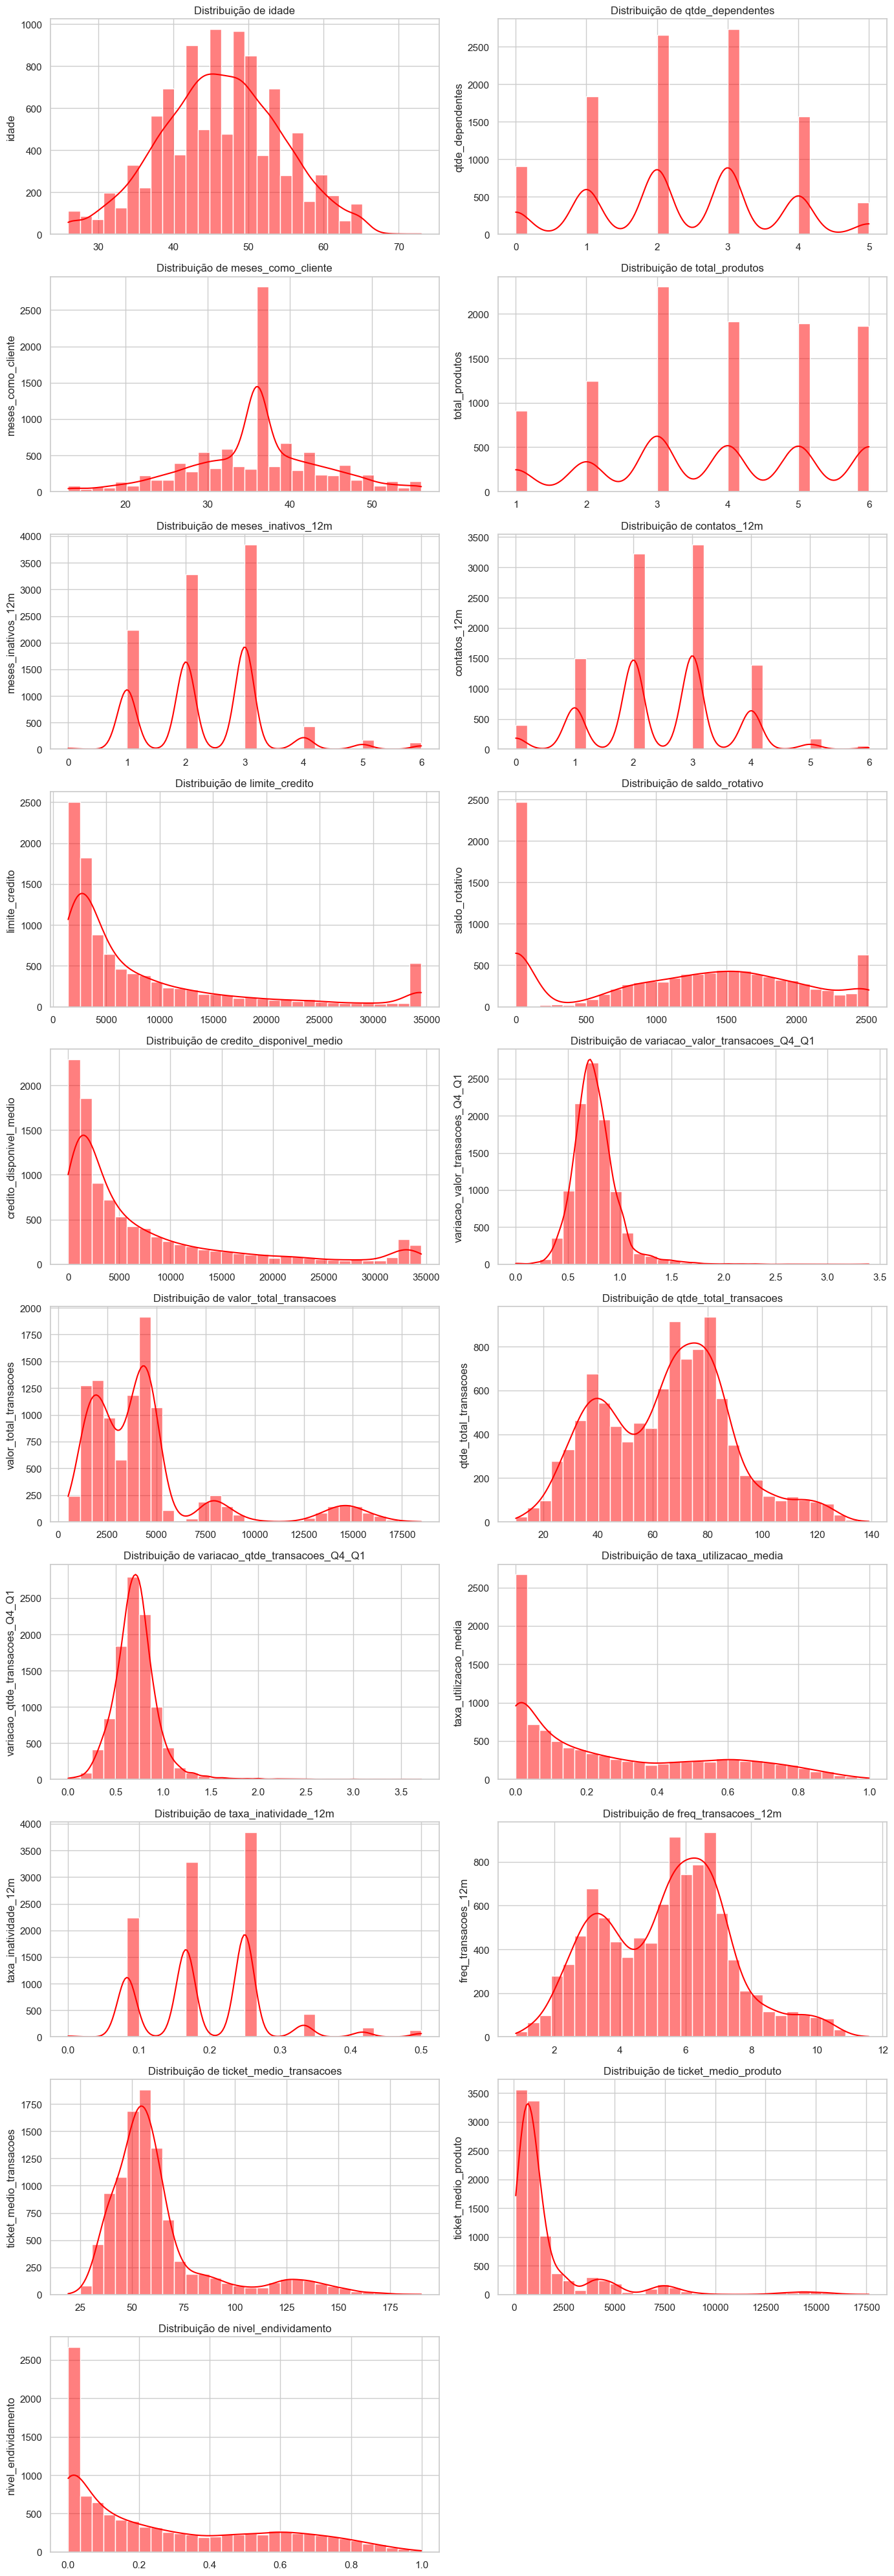

In [12]:
# Cria a figura e os eixos
fig, axes = plt.subplots(n_linhas_numericas, n_colunas, figsize=(14, n_linhas_numericas * 4))
axes = axes.flatten()

# Loop pelas variáveis numéricas
for idx, coluna in enumerate(variaveis_numericas):
    sns.histplot(data=dados, x=coluna, kde=True, bins=30, ax=axes[idx], color='red')
    axes[idx].set_title(f'Distribuição de {coluna}')
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel(coluna)
    
    # Salva cada gráfico individualmente
    fig_2, axes_2 = plt.subplots(figsize=(7, 4))
    sns.histplot(data=dados, x=coluna, kde=True, bins=30, color='red', ax=axes_2)
    axes_2.set_title(f'Distribuição de {coluna}')
    axes_2.set_xlabel('')
    axes_2.set_ylabel(coluna)
    fig_2.savefig(f'../figures/grafico_univiariada_histograma_{coluna}.png',dpi=300)
    plt.close(fig_2)
# Remove eixos vazios se sobrarem
for i in range(len(variaveis_numericas), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()

# Salva a imagem completa
fig.savefig('../figures/graficos_univariada_histogramas.png', dpi=300)

plt.show()

**Principais Insights dos Histogramas**

**Perfil Demográfico e de Relacionamento**

- A maioria dos clientes está na faixa etária entre 40 e 50 anos, refletindo um público mais maduro e possivelmente mais estável financeiramente
- O tempo de relacionamento com o banco mostra uma forte concentração em 36 meses, indicando que boa parte da base está completando 3 anos de vínculo — um ponto potencial de atenção quanto à fidelização
- A quantidade média de produtos bancários contratados é baixa (3 produtos), sugerindo pouca diversificação no uso dos serviços da instituição

**Comportamento Financeiro**

Observa-se a formação de dois grupos distintos:

- Um grupo conservador (cerca de 80%), com baixa utilização de crédito (menor que 20% do limite), baixo endividamento e saldos reduzidos
- Um grupo mais ativo (cerca de 20%), que realiza mais transações e utiliza o crédito com maior intensidade
- A distribuição do limite de crédito e do crédito disponível é altamente assimétrica à direita, com grande parte dos clientes concentrados em faixas baixas (abaixo de USD 5.000)

**Padrões de Atividade Transacional**
- O volume total de transações apresenta distribuição bimodal, o que reforça a existência dos dois perfis distintos (baixo vs. alto uso)
- A frequência mensal de transações está concentrada entre 4 a 7 operações, com um ticket médio entre USD 50 e USD 75, sugerindo um padrão de consumo regular e moderado
- O ticket médio por produto também é baixo (maioria abaixo de USD 2.000), o que reforça o perfil de uso básico da base

**Sinais de Alerta**
- A taxa de inatividade entre os clientes é significativa: a maioria apresenta 2 a 3 meses/ano sem movimentação.
- Além disso, houve uma queda média de 20% a 30% no valor e na quantidade de transações entre o primeiro e o último trimestre analisado (Q4 vs Q1), sugerindo uma possível tendência de desengajamento.

### Boxplot

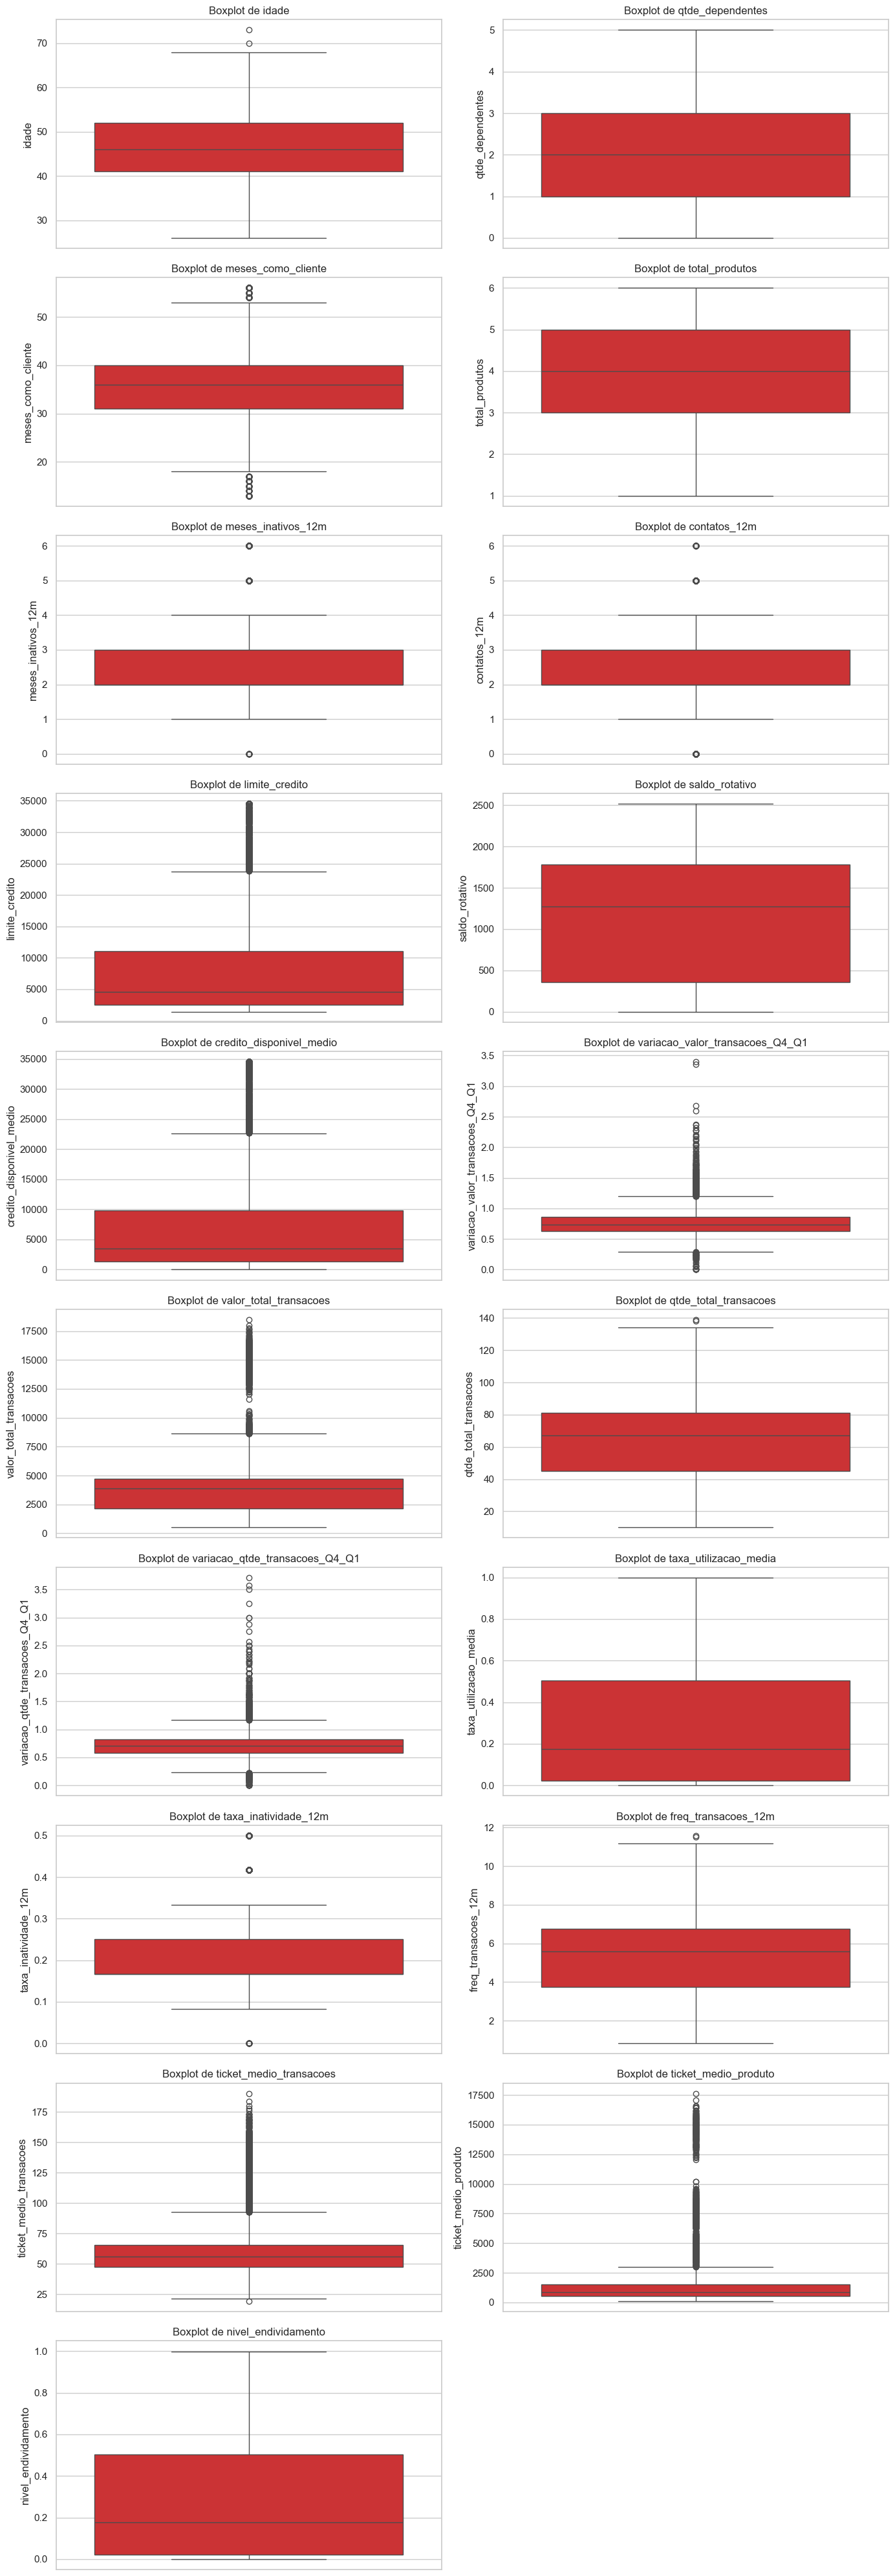

In [13]:
# Cria a figura e os eixos
fig, axes = plt.subplots(n_linhas_numericas, n_colunas, figsize=(14, n_linhas_numericas * 4))
axes = axes.flatten()


# Loop pelas variáveis numéricas
for idx, coluna in enumerate(variaveis_numericas):
    sns.boxplot(y=dados[coluna], ax=axes[idx], color='#e41a1c')
    axes[idx].set_title(f'Boxplot de {coluna}')
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel(coluna)

    # Salva cada gráfico individualmente
    fig_2, axes_2 = plt.subplots(figsize=(7, 4))
    sns.boxplot(y=dados[coluna], ax=axes_2, color='#e41a1c')
    axes_2.set_title(f'Boxplot de {coluna}')
    axes_2.set_xlabel('')
    axes_2.set_ylabel('Contagem')
    fig_2.savefig(f'../figures/grafico_univiariada_boxplot_{coluna}.png',dpi=300)
    plt.close(fig_2)


# Remove eixos vazios se sobrarem
for i in range(len(variaveis_numericas), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()

# Salva a imagem completa
fig.savefig('../figures/graficos_univariada_boxplots.png', dpi=300)

plt.show()



**Principais Insights dos Boxplots**

**Perfil Demográfico e Relacional**
- A maior parte dos clientes está entre 40 e 55 anos, com distribuição simétrica e poucos outliers acima de 70 anos
- A maioria possui entre 0 e 3 dependentes, reforçando o perfil familiar enxuto
 - O tempo de relacionamento apresenta mediana em 36 meses, com presença de outliers em extremos (>50 meses ou <20), sugerindo possíveis ciclos distintos de fidelização

**Padrões de Comportamento Financeiro**
- Forte concentração de clientes com baixa utilização do crédito (<20%) e níveis baixos de endividamento, mas com alta dispersão e presença de outliers em variáveis como limite de crédito, saldo rotativo e crédito disponível
- Indícios de segmentos extremos: clientes com limites altos e saldos elevados contrastam com a maioria que mantém perfil conservador

**Sinais de Alerta**
- Alta quantidade de outliers financeiros: valores extremos em limite de crédito, valor transacionado, ticket médio por produto e saldo rotativo indicam perfis heterogêneos, exigindo cuidado na modelagem
- Oscilações bruscas nas transações (Q4 vs Q1): presença significativa de outliers nas variações de valor e quantidade transacionada, sugerindo mudanças de comportamento que podem estar associadas a evasão
- Clientes com uso excessivo ou inatividade prolongada: apesar da mediana razoável em frequência mensal (6/mês), existem outliers com altíssima inatividade (>40%), o que pode sinalizar desengajamento avançado

**Oportunidades Identificadas**

- Necessidade de normalização ou categorização por faixas para lidar com variáveis financeiras com cauda longa e outliers
- Uso de variáveis como variações trimestrais, taxa de utilização e saldo rotativo como potentes preditores de churn, dada sua alta dispersão e relação com comportamento

### Gráficos Categóricos - Contagem

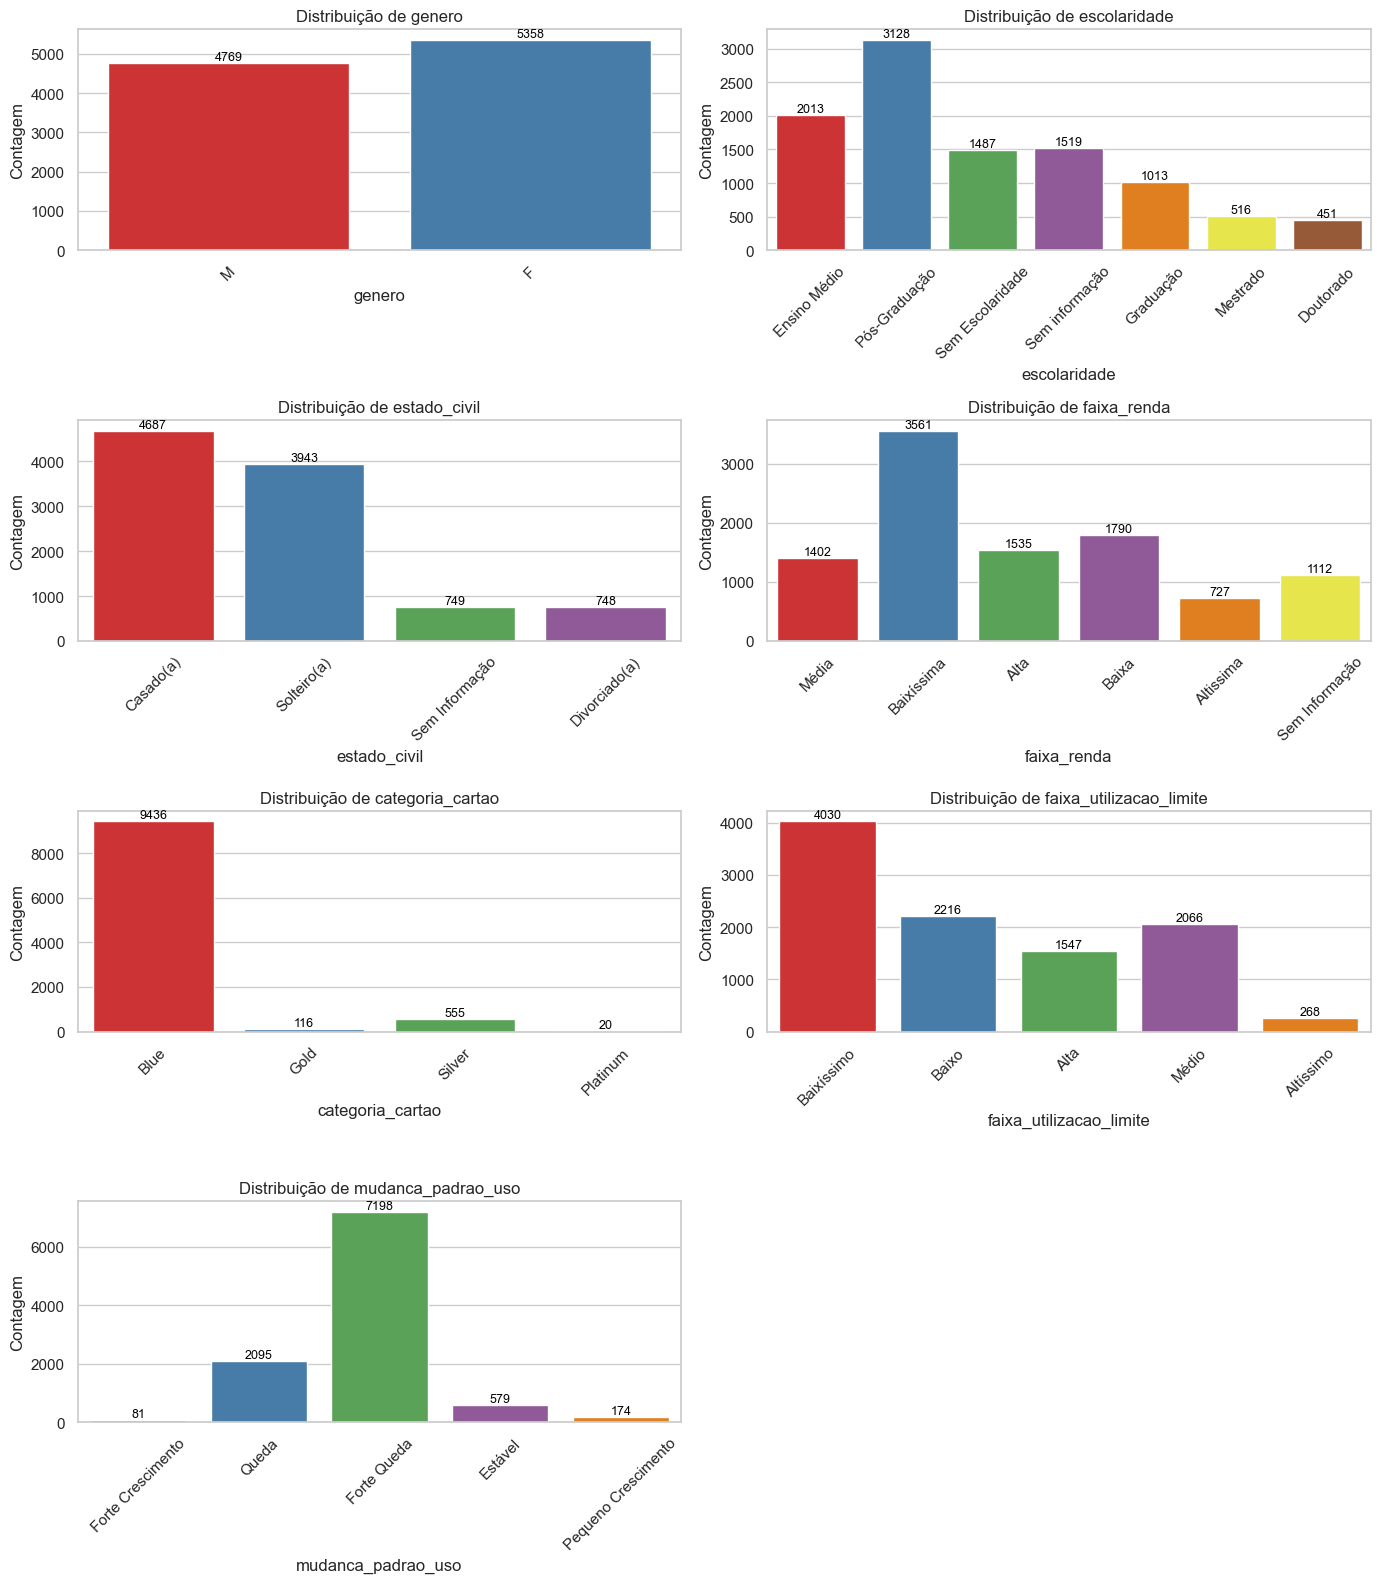

In [14]:
# Criar a grade de subplots
fig, axes = plt.subplots(n_linhas_categoricas, n_colunas, figsize=(14, n_linhas_categoricas * 4))
axes = axes.flatten()

# Loop para criar um gráfico para cada variável
for idx, coluna in enumerate(variaveis_categoricas):
    ax = axes[idx]
    sns.countplot(data=dados, x=coluna, palette='Set1', ax=ax)
    ax.set_title(f'Distribuição de {coluna}')
    ax.set_xlabel(coluna)
    ax.set_ylabel('Contagem')
    ax.tick_params(axis='x', rotation=45)

    # Adiciona rótulo de contagem em cima das barras
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Só coloca o rótulo se a barra não for vazia
            ax.annotate(f'{int(height)}', 
                        (p.get_x() + p.get_width() / 2., height + 0.5),
                        ha='center', va='bottom', fontsize=9, color='black')

    # Salva cada gráfico individualmente
    fig_2, axes_2 = plt.subplots(figsize=(7, 4))
    sns.countplot(data=dados, x=coluna, palette='Set1', ax=axes_2)
    axes_2.set_title(f'Distribuição de {coluna}')
    axes_2.set_xlabel(coluna)
    axes_2.set_ylabel('Contagem')
    axes_2.tick_params(axis='x', rotation=45)

    # Rótulo também no gráfico individual
    for p in axes_2.patches:
        height = p.get_height()
        if height > 0:
            axes_2.annotate(f'{int(height)}',
                            (p.get_x() + p.get_width() / 2., height + 0.5),
                            ha='center', va='bottom', fontsize=9, color='black')

    fig_2.savefig(f'../figures/grafico_univiariada_categoricas_contagem_{coluna}.png',dpi=300)
    plt.close(fig_2)

# Remove plots vazios se sobrarem
for i in range(len(variaveis_categoricas), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()

# Salva a imagem completa
fig.savefig('../figures/graficos_univariada_categoricas_contagem.png', dpi=300)

plt.show()


**Principais Insights dos Gráficos Categóricos - Contagem**

**Perfil Demográfico e Sociocultural**
- A distribuição entre homens e mulheres é equilibrada, sem viés de gênero relevante
- A escolaridade dos clientes está concentrada em níveis intermediários, com destaque para Pós-Graduação e Ensino Médio. Há também presença significativa de clientes sem escolaridade informada ou declarada, enquanto Mestrado e Doutorado são menos frequentes

**Estado Civil**
- A maior parte dos clientes está nas categorias "casado(a)" ou "solteiro(a)", indicando predominância de perfis familiares tradicionais ou individuais. As categorias "divorciado(a)" e "sem informação" representam grupos menores

**Perfil Financeiro**
- A faixa de renda está concentrada nas categorias mais baixas, especialmente na "baixíssima". Isso indica um público com menor poder aquisitivo
- A categoria de cartão mais comum é a Blue, amplamente predominante, o que evidencia o uso de produtos básicos por grande parte da base
- A maioria dos clientes faz uso reduzido do limite de crédito disponível, estando nas faixas "baixíssimo", "baixo" ou "médio"

**Sinais de Alerta**
- A variável mudança no padrão de uso é crítica: a maioria dos clientes apresentou forte queda no comportamento transacional, o que representa um dos principais indícios de evasão iminente
- A baixa penetração de cartões de maior valor (Silver, Gold, Platinum) e de faixas de alta renda mostra uma base pouco explorada para produtos premium
- A variável mudança no padrão de uso revelou um forte indicativo de desengajamento: a maior parte da base apresentou queda acentuada no volume de uso dos serviços bancários, com destaque para a categoria "Forte Queda"

### Gráficos Categóricos - Proporção

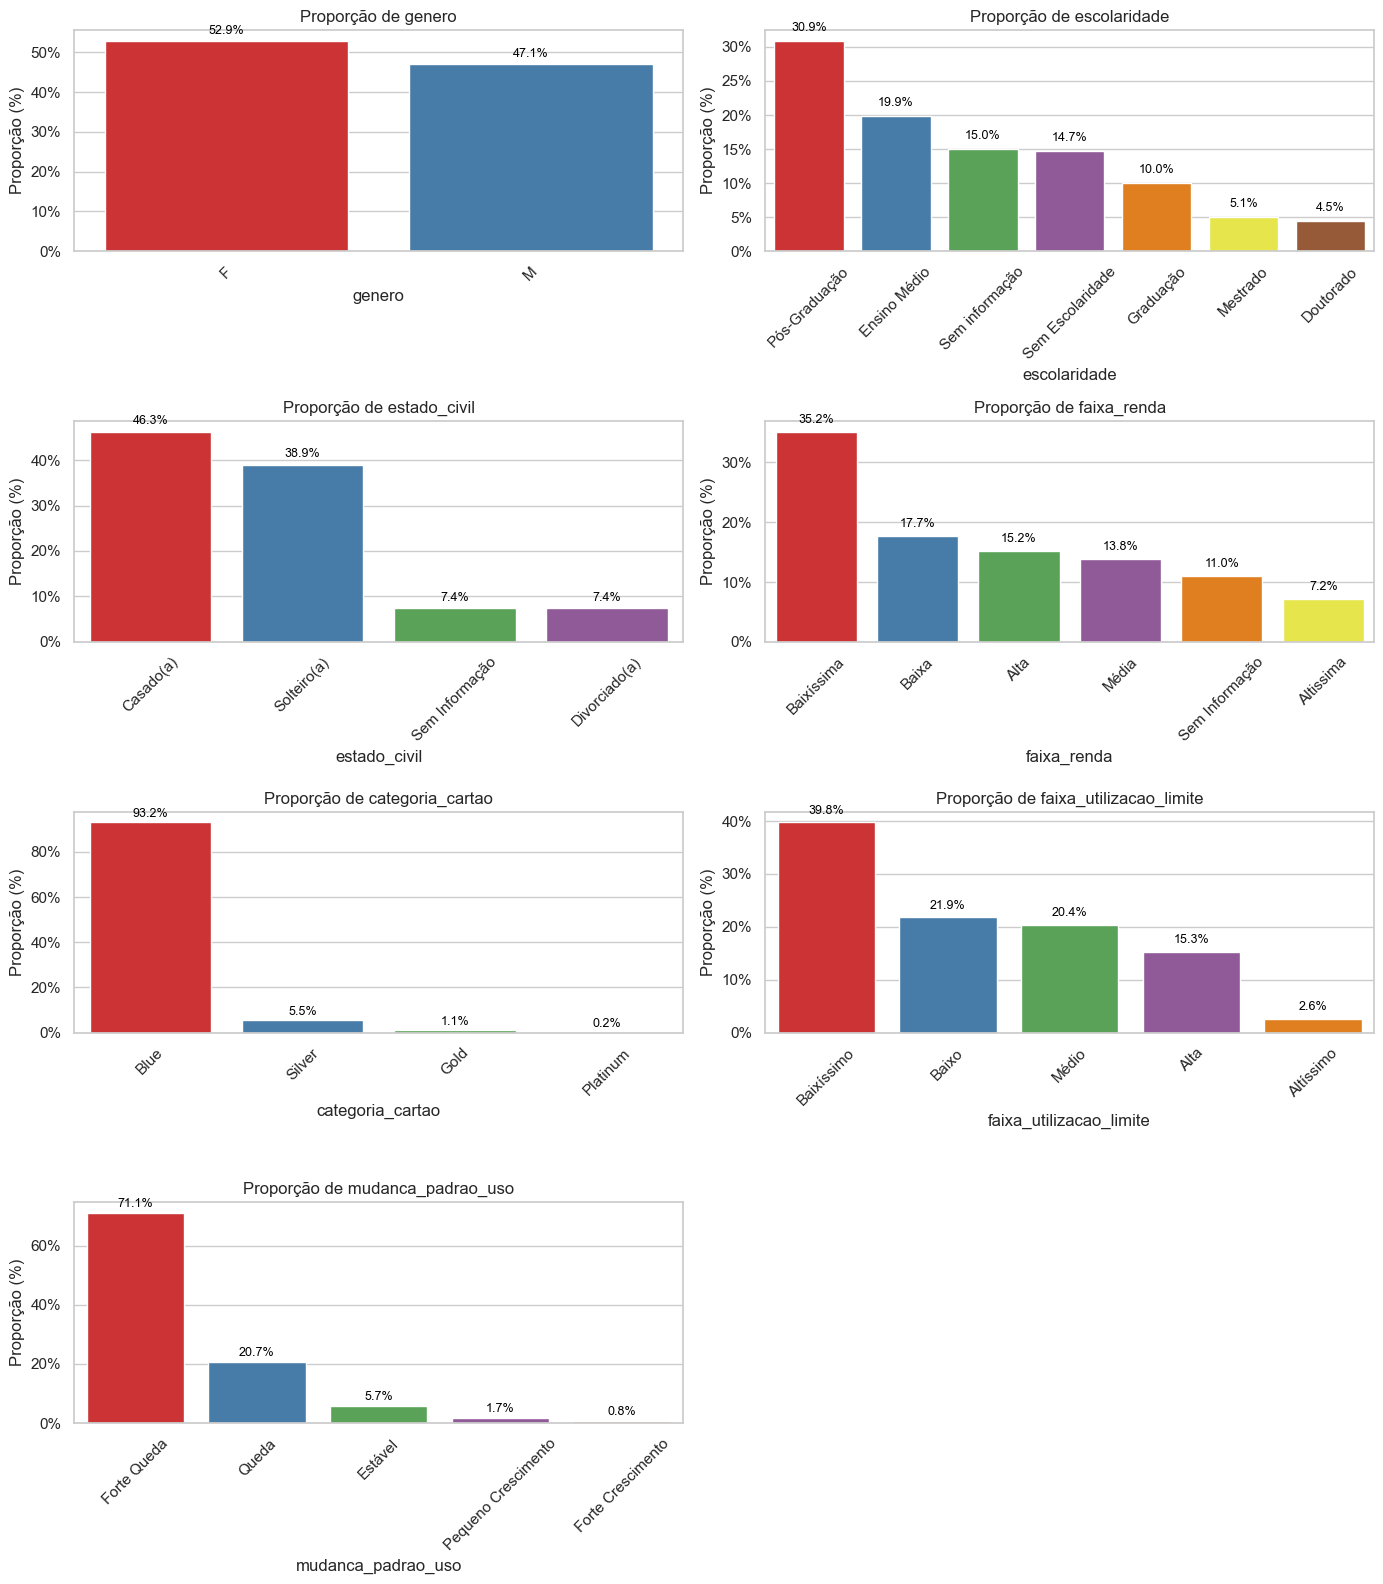

In [15]:
# Criar a grade de subplots
fig, axes = plt.subplots(n_linhas_categoricas, n_colunas, figsize=(14, n_linhas_categoricas * 4))
axes = axes.flatten()

# Loop para criar um gráfico para cada variável
for idx, coluna in enumerate(variaveis_categoricas):
    proporcao = dados[coluna].value_counts(normalize=True) * 100
    ax = axes[idx]
    sns.barplot(x=proporcao.index, y=proporcao.values, ax=ax, palette='Set1')
    ax.set_title(f'Proporção de {coluna}')
    ax.set_ylabel('Proporção (%)')
    ax.set_xlabel(coluna)
    ax.tick_params(axis='x', rotation=45)
    
    # Corrige para formatar o eixo Y como porcentagem
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

    # Adicionar rótulos percentuais em cima das barras
    for p in ax.patches:
        height = p.get_height()
        if height > 0.0001:  
            ax.annotate(f'{height:.1f}%', 
                        (p.get_x() + p.get_width() / 2., height + 1),
                        ha='center', va='bottom', fontsize=9, color='black')

    # Salva cada gráfico individualmente
    fig_2, axes_2 = plt.subplots(figsize=(7, 4))
    sns.barplot(x=proporcao.index, y=proporcao.values, ax=axes_2, palette='Set1')
    axes_2.set_title(f'Proporção de {coluna}')
    axes_2.set_ylabel('Proporção (%)')
    axes_2.set_xlabel(coluna)
    axes_2.tick_params(axis='x', rotation=45)
    axes_2.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

    # Rótulo também no gráfico individual
    for p in axes_2.patches:
        height = p.get_height()
        if height > 0.0001:
            axes_2.annotate(f'{height:.1f}%',
                            (p.get_x() + p.get_width() / 2., height + 1),
                            ha='center', va='bottom', fontsize=9, color='black')

    fig_2.savefig(f'../figures/grafico_univiariada_categoricas_proporcao_{coluna}.png',dpi=300)
    plt.close(fig_2)

# Remove plots vazios se sobrarem
for i in range(len(variaveis_categoricas), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()

# Salva a imagem completa
fig.savefig('../figures/graficos_univariada_categoricas_proporcao.png', dpi=300)

plt.show()


**Principais Insights dos Gráficos Categóricos - Proporção**

**Perfil Demográfico e Sociocultural**
- A distribuição entre gêneros é equilibrada, sem indícios de viés relevante
- A escolaridade está concentrada em níveis intermediários: Pós-Graduação e Ensino Médio são as categorias mais frequentes. Também há um volume relevante de clientes sem informação ou sem escolaridade formal, enquanto níveis mais altos (Mestrado e Doutorado) são minoritários

**Estado Civil**
- A maioria dos clientes é casada, seguida por solteiros. Divorciados e clientes sem informação compõem uma parcela menor, sem distorções relevantes

**Perfil Financeiro**
- A base tem forte concentração nas faixas de renda mais baixas, com pouca penetração em faixas médias e altas, o que reforça o perfil de menor poder aquisitivo
- A ampla maioria dos clientes utiliza cartões da categoria Blue, evidenciando uma base com acesso limitado a produtos premium ou personalizados
- A utilização do limite de crédito também é baixa: a maior parte da base utiliza apenas uma pequena fração do limite disponível

**Sinais de Alerta**
- A variável mudança no padrão de uso é um dos principais alertas: a grande maioria dos clientes apresentou forte queda no uso dos produtos, sinal claro de desengajamento e risco de evasão
- A baixa penetração de produtos de maior valor (cartões Gold, Silver, Platinum) e o uso limitado do crédito disponível indicam subutilização da carteira de produtos e potencial evasão por falta de estímulo

## Análise Bivariada

O uso da análise bivariada permite identificar relações entre duas variáveis para revelar padrões e correlações relevantes, direcionando ações estratégicas com base em evidências estatísticas. Simplifica a tomada de decisão ao focar nas interações mais impactantes nos dados.

### Histogramas

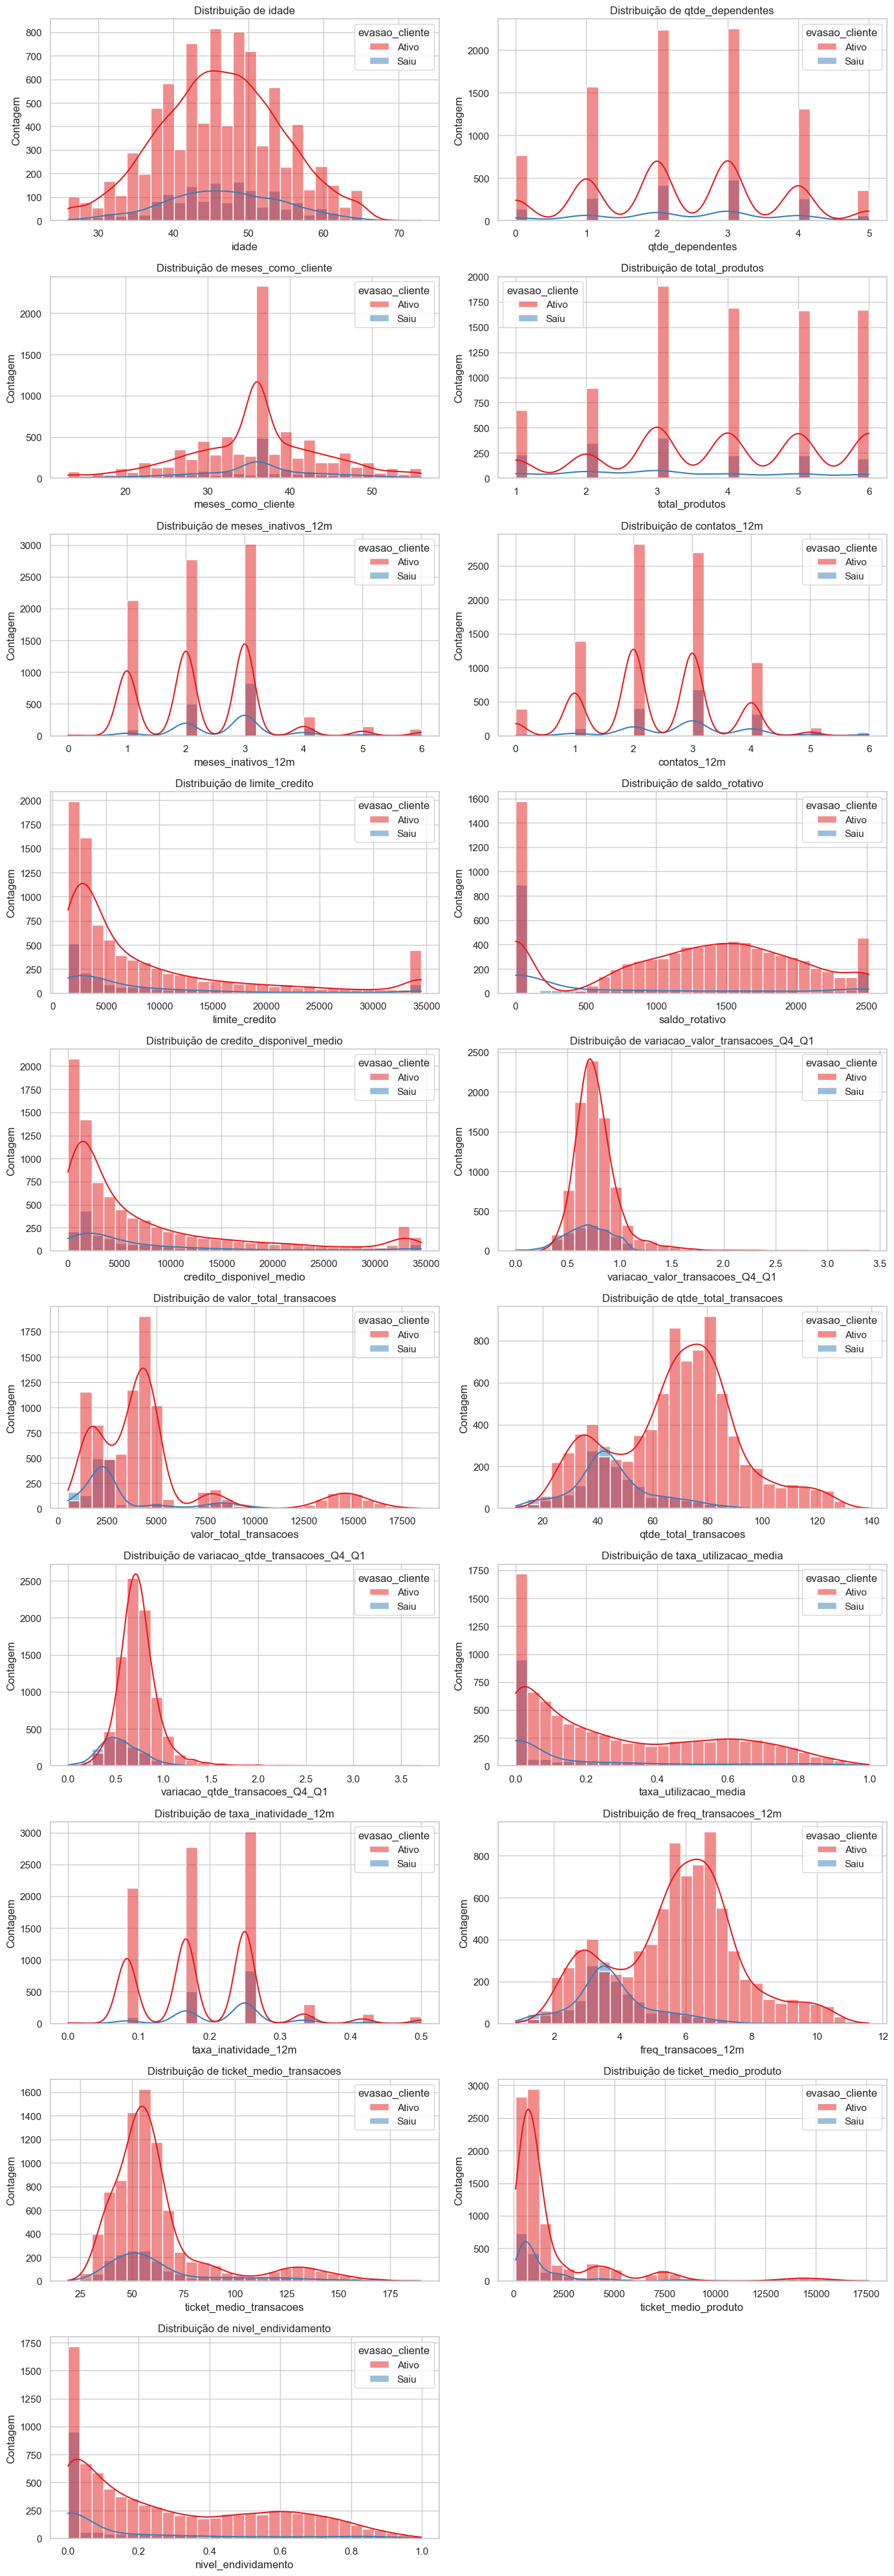

In [16]:
# Cria a figura e os eixos
fig, axes = plt.subplots(n_linhas_numericas, n_colunas, figsize=(14, n_linhas_numericas * 4))
axes = axes.flatten()

# Loop pelas variáveis
for idx, coluna in enumerate(variaveis_numericas):
    ax = axes[idx]
    sns.histplot(data=dados, x=coluna, kde=True, hue='evasao_cliente', bins=30, palette='Set1', ax=ax)
    ax.set_title(f'Distribuição de {coluna}')
    ax.set_xlabel(coluna)
    ax.set_ylabel('Contagem')

    # Salva cada gráfico individualmente
    fig_2, axes_2 = plt.subplots(figsize=(7, 4))
    sns.histplot(data=dados, x=coluna, kde=True, hue='evasao_cliente', bins=30, palette='Set1', ax=axes_2)
    axes_2.set_title(f'Distribuição de {coluna}')
    axes_2.set_xlabel(coluna)
    axes_2.set_ylabel('Contagem')
    fig_2.savefig(f'../figures/grafico_bivariada_histograma_{coluna}.png',dpi=300)
    plt.close(fig_2)

# Remove eixos vazios, se houver
for i in range(len(variaveis_numericas), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()

fig.savefig('../figures/graficos_bivariada_histogramas.png', dpi=300)

plt.show()

**Principais Insights dos Histogramas**

**Perfil Demográfico e Relacional**
- Idade e quantidade de dependentes apresentam distribuições semelhantes entre clientes ativos e saídos. Isoladamente, essas variáveis possuem baixo poder preditivo
- Tempo como cliente concentra-se em 36 meses para ambos os grupos, mas clientes com menor tempo de casa apresentam maior propensão à evasão — sugerindo utilidade em combinação com outras variáveis
- Clientes que saíram possuem menos produtos bancários, o que pode indicar menor envolvimento com a instituição

**Perfil Financeiro**
- Clientes ativos tendem a ter limites de crédito mais altos e maior crédito disponível, enquanto clientes que saíram mostram maior saldo rotativo, menor crédito disponível médio e nível de endividamento mais elevado
- Esses indicadores sugerem que clientes em situação financeira mais frágil estão mais propensos a evasão

**Atividade e Padrão de Transações**
- Clientes que saíram realizam menos transações anuais e mensais, movimentam valores menores e apresentam tickets médios por produto mais baixos
- Há forte queda no valor e na frequência das transações ao longo do tempo (Q4 vs Q1) entre os clientes que saíram — sinal claro de desengajamento progressivo
- A taxa de inatividade e a utilização do limite de crédito também são maiores entre clientes que evadiram, reforçando a correlação com perda de engajamento

**Sinais de Alerta**
- Meses inativos, saldo rotativo elevado, alta taxa de utilização do limite e redução acentuada nas transações (volume e frequência) são os principais marcadores de evasão
- Clientes com menos produtos também demonstram maior risco, indicando baixo envolvimento com os serviços do banco


### Boxplot

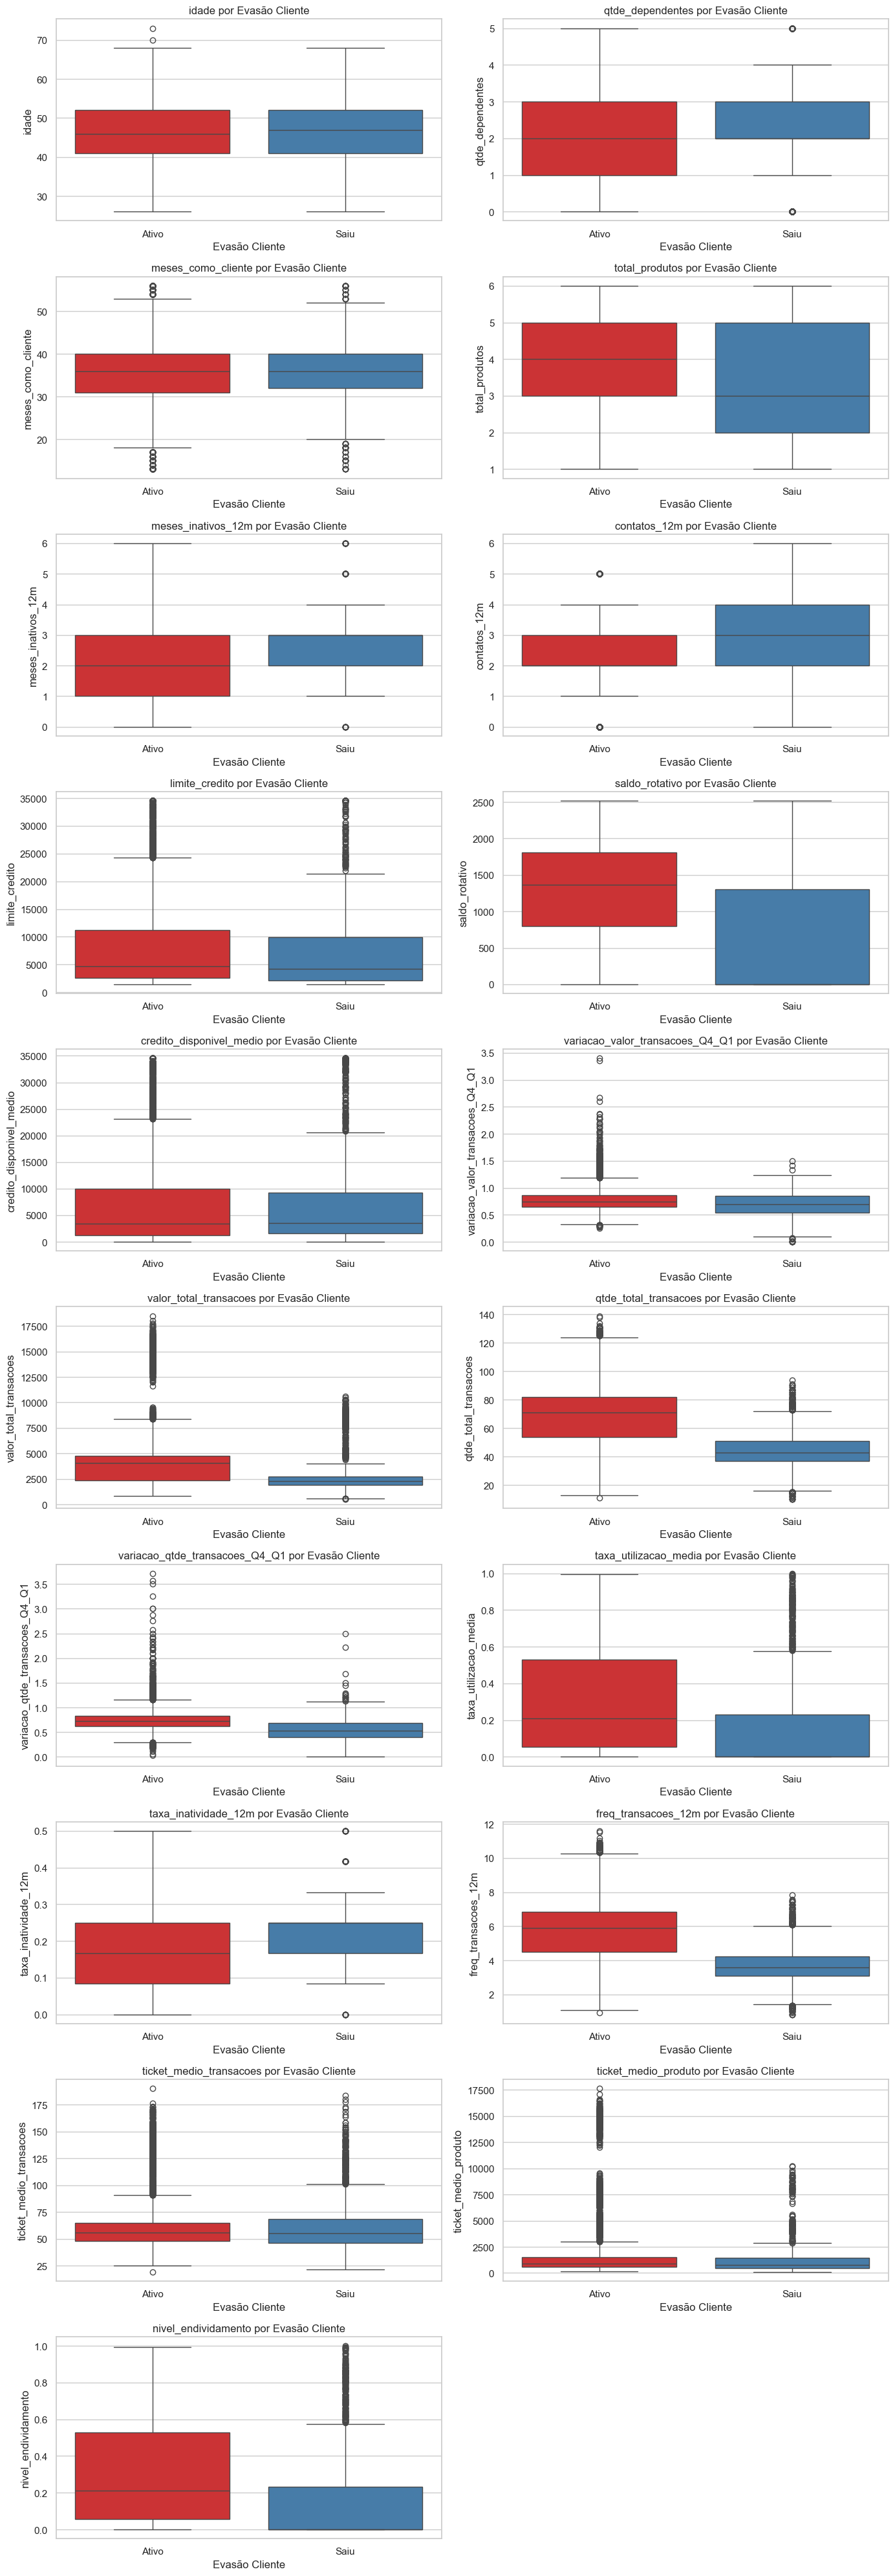

In [17]:
# Cria a figura e os eixos
fig, axes = plt.subplots(n_linhas_numericas, n_colunas, figsize=(14, n_linhas_numericas * 4))
axes = axes.flatten()

# Loop pelas variáveis numéricas
for idx, coluna in enumerate(variaveis_numericas):
    sns.boxplot(data=dados, x='evasao_cliente', y=coluna, palette='Set1', ax=axes[idx])
    axes[idx].set_title(f'{coluna} por Evasão Cliente')
    axes[idx].set_xlabel('Evasão Cliente')
    axes[idx].set_ylabel(coluna)

    # Salva cada gráfico individualmente
    fig_2, axes_2 = plt.subplots(figsize=(7, 4))
    sns.boxplot(data=dados, x='evasao_cliente', y=coluna, palette='Set1', ax=axes_2)
    axes_2.set_title(f'{coluna} por Evasão Cliente')
    axes_2.set_xlabel('Evasão Cliente')
    axes_2.set_ylabel(coluna)
    fig_2.savefig(f'../figures/grafico_bivariada_boxplot_{coluna}.png',dpi=300)
    plt.close(fig_2)


# Remove eixos vazios se sobrarem
for i in range(len(variaveis_numericas), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()

fig.savefig('../figures/graficos_bivariada_boxplots.png', dpi=300)

plt.show()

**Principais Insights dos Boxplots**

**Perfil Demográfico e Relacional**
- Idade e quantidade de dependentes apresentam distribuições semelhantes entre clientes ativos e os que saíram. A diferença nas medianas é pequena, o que sugere baixo poder discriminativo isoladamente
- Clientes que saíram tendem a ter um tempo de relacionamento ligeiramente menor, reforçando a importância de observar a fase do ciclo de vida do cliente.
- O número de produtos bancários contratados é menor entre os clientes que saíram — quanto menos produtos, maior o risco de evasão.

**Perfil Financeiro**
- Limites de crédito são mais altos entre clientes ativos, sugerindo que limites reduzidos podem estar relacionados a menor fidelização
- Crédito disponível médio é mais baixo entre os que saíram, o que pode indicar utilização mais agressiva ou perfil financeiro mais apertado
- Curiosamente, clientes ativos mantêm saldos rotativos mais elevados, o que pode indicar relacionamento mais profundo com o crédito bancário

**Atividade e Padrão de Transações**
- A frequência de transações, o valor total movimentado e a quantidade anual de transações são todos superiores entre os clientes ativos
- Os clientes que saíram apresentaram quedas mais acentuadas tanto em valor quanto em volume de transações ao longo do tempo (Q4 vs Q1), refletindo perda progressiva de engajamento
- A taxa média de utilização do crédito e a taxa de inatividade também diferenciam fortemente os grupos — com clientes que saíram demonstrando menor uso de crédito e maior inatividade
- Ticket médio por transação se mantém semelhante entre os grupos, mas o ticket por produto é mais alto entre os ativos, indicando maior valor agregado ao uso dos produtos

**Sinais de Alerta**
- Meses inativos, queda na frequência e volume de transações, baixo número de produtos, menor utilização de crédito e aumento da inatividade são os principais marcadores de evasão
- Clientes com engajamento financeiro reduzido, especialmente no uso recorrente e diversificado dos produtos, estão mais propensos à evasão



### Gráficos Categóricos - Contagem

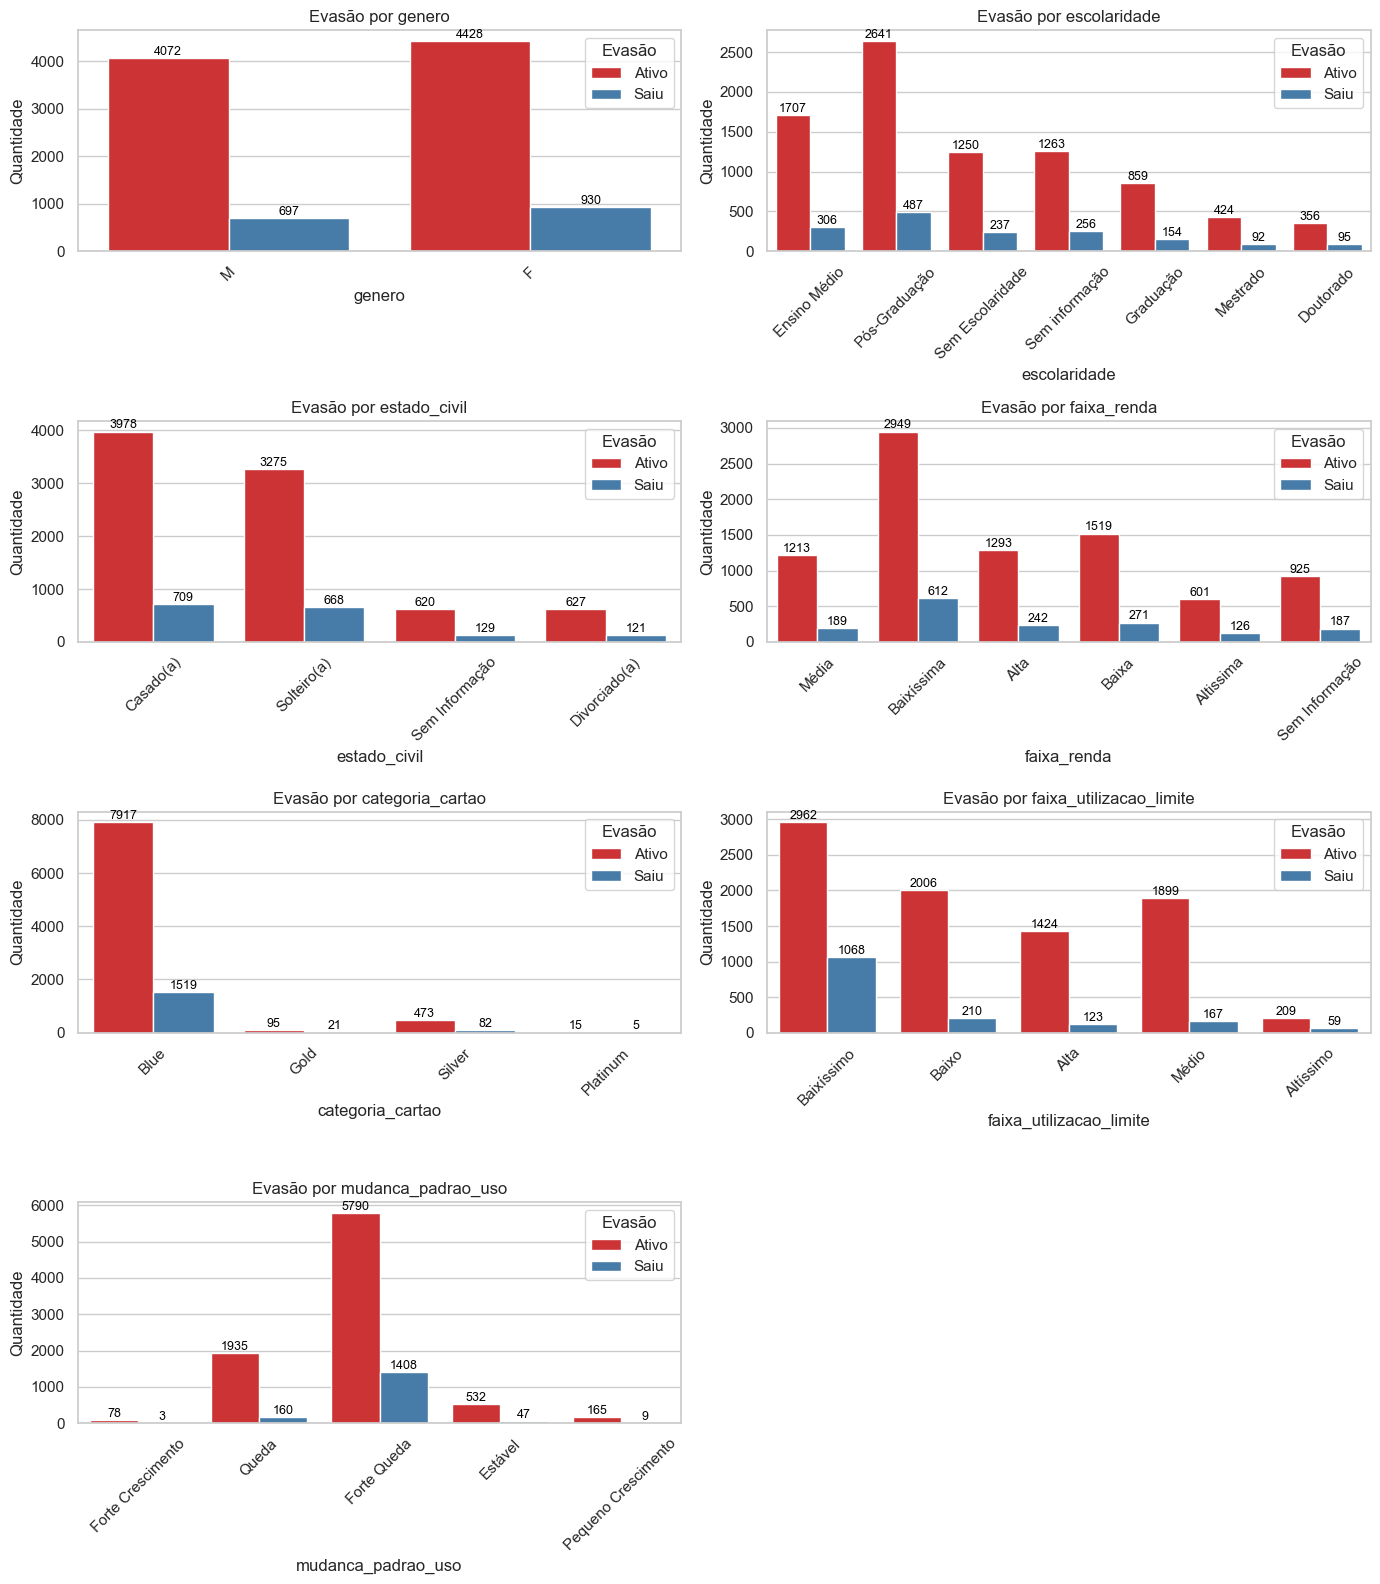

In [18]:
# Criar a grade de subplots
fig, axes = plt.subplots(n_linhas_categoricas, n_colunas, figsize=(14, n_linhas_categoricas * 4))
axes = axes.flatten()

# Loop para criar um gráfico para cada variável
for idx, coluna in enumerate(variaveis_categoricas):
    ax = axes[idx]  # define corretamente o ax usado
    sns.countplot(data=dados, x=coluna, hue='evasao_cliente', palette='Set1', ax=ax)
    ax.set_title(f'Evasão por {coluna}')
    ax.set_xlabel(coluna)
    ax.set_ylabel('Quantidade')
    ax.legend(title='Evasão')
    ax.tick_params(axis='x', rotation=45)

    # Adiciona rótulo de contagem em cima das barras
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Só coloca o rótulo se a barra não for vazia
            ax.annotate(f'{int(height)}', 
                        (p.get_x() + p.get_width() / 2., height + 1),
                        ha='center', va='bottom', fontsize=9, color='black')
   
    # Salva cada gráfico individualmente
    fig_2, axes_2 = plt.subplots(figsize=(7, 4))
    sns.countplot(data=dados, x=coluna, hue='evasao_cliente', palette='Set1', ax=axes_2)
    axes_2.set_title(f'Evasão por {coluna}')
    axes_2.set_xlabel(coluna)
    axes_2.set_ylabel('Quantidade')
    axes_2.legend(title='Evasão')
    axes_2.tick_params(axis='x', rotation=45)

    # Rótulos no gráficos individuais
    for p in axes_2.patches:
        height = p.get_height()
        if height > 0:  # Só coloca o rótulo se a barra não for vazia
            axes_2.annotate(f'{int(height)}', 
                            (p.get_x() + p.get_width() / 2., height + 1),
                            ha='center', va='bottom', fontsize=9, color='black')
    
    fig_2.savefig(f'../figures/grafico_biviariada_categoricas_contagem_{coluna}.png',dpi=300)
    plt.close(fig_2)
    
# Remove eixos vazios se sobrarem
for i in range(len(variaveis_categoricas), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()

fig.savefig('../figures/graficos_bivariada_categoricas_contagem.png', dpi=300)

plt.show()

**Principais Insights dos Gráficos Categóricos - Contagem**

**Perfil Demográfico e Sociocultural**
- A evasão ocorre de forma equilibrada entre gêneros, com leve predominância feminina entre os clientes ativos
- Escolaridade apresenta maior evasão entre clientes com Ensino Médio ou Sem Escolaridade. Já os pós-graduados concentram mais clientes ativos, mas também representam uma fração relevante dos que evadiram
- Estado civil mostra que casados e solteiros compõem a maioria da base. Contudo, os solteiros tendem a evadir com mais frequência, o que pode estar relacionado a menor estabilidade financeira ou envolvimento com o banco

**Perfil Financeiro**
- A evasão está concentrada nas faixas de renda mais baixas, principalmente na renda baixíssima. Já clientes com renda alta ou altíssima tendem a permanecer ativos.
- A categoria Blue predomina entre os que saem e os que ficam, mas as categorias superiores (Silver, Gold, Platinum) têm evasão muito baixa — embora também representem uma parcela reduzida da base

- A utilização do limite de crédito está diretamente associada à evasão: clientes que utilizam pouco tendem a sair, enquanto aqueles que usam de forma moderada ou elevada permanecem mais

**Atividade e Engajamento**
- O principal fator discriminativo é a mudança no padrão de uso: clientes com forte queda no uso dos produtos apresentam alta taxa de evasão
- Já padrões estáveis ou de crescimento estão claramente associados à manutenção do relacionamento com o banco

**Sinais de Alerta**
-Forte queda no padrão de uso é o principal preditor visual de evasão
- Baixa utilização do limite de crédito, baixa movimentação financeira e renda muito baixa também se destacam como fatores críticos de risco
- Escolaridade inferior e estado civil solteiro têm associação moderada com evasão e devem ser analisados em conjunto com variáveis de engajamento

### Gráficos Categóricos - Proporção

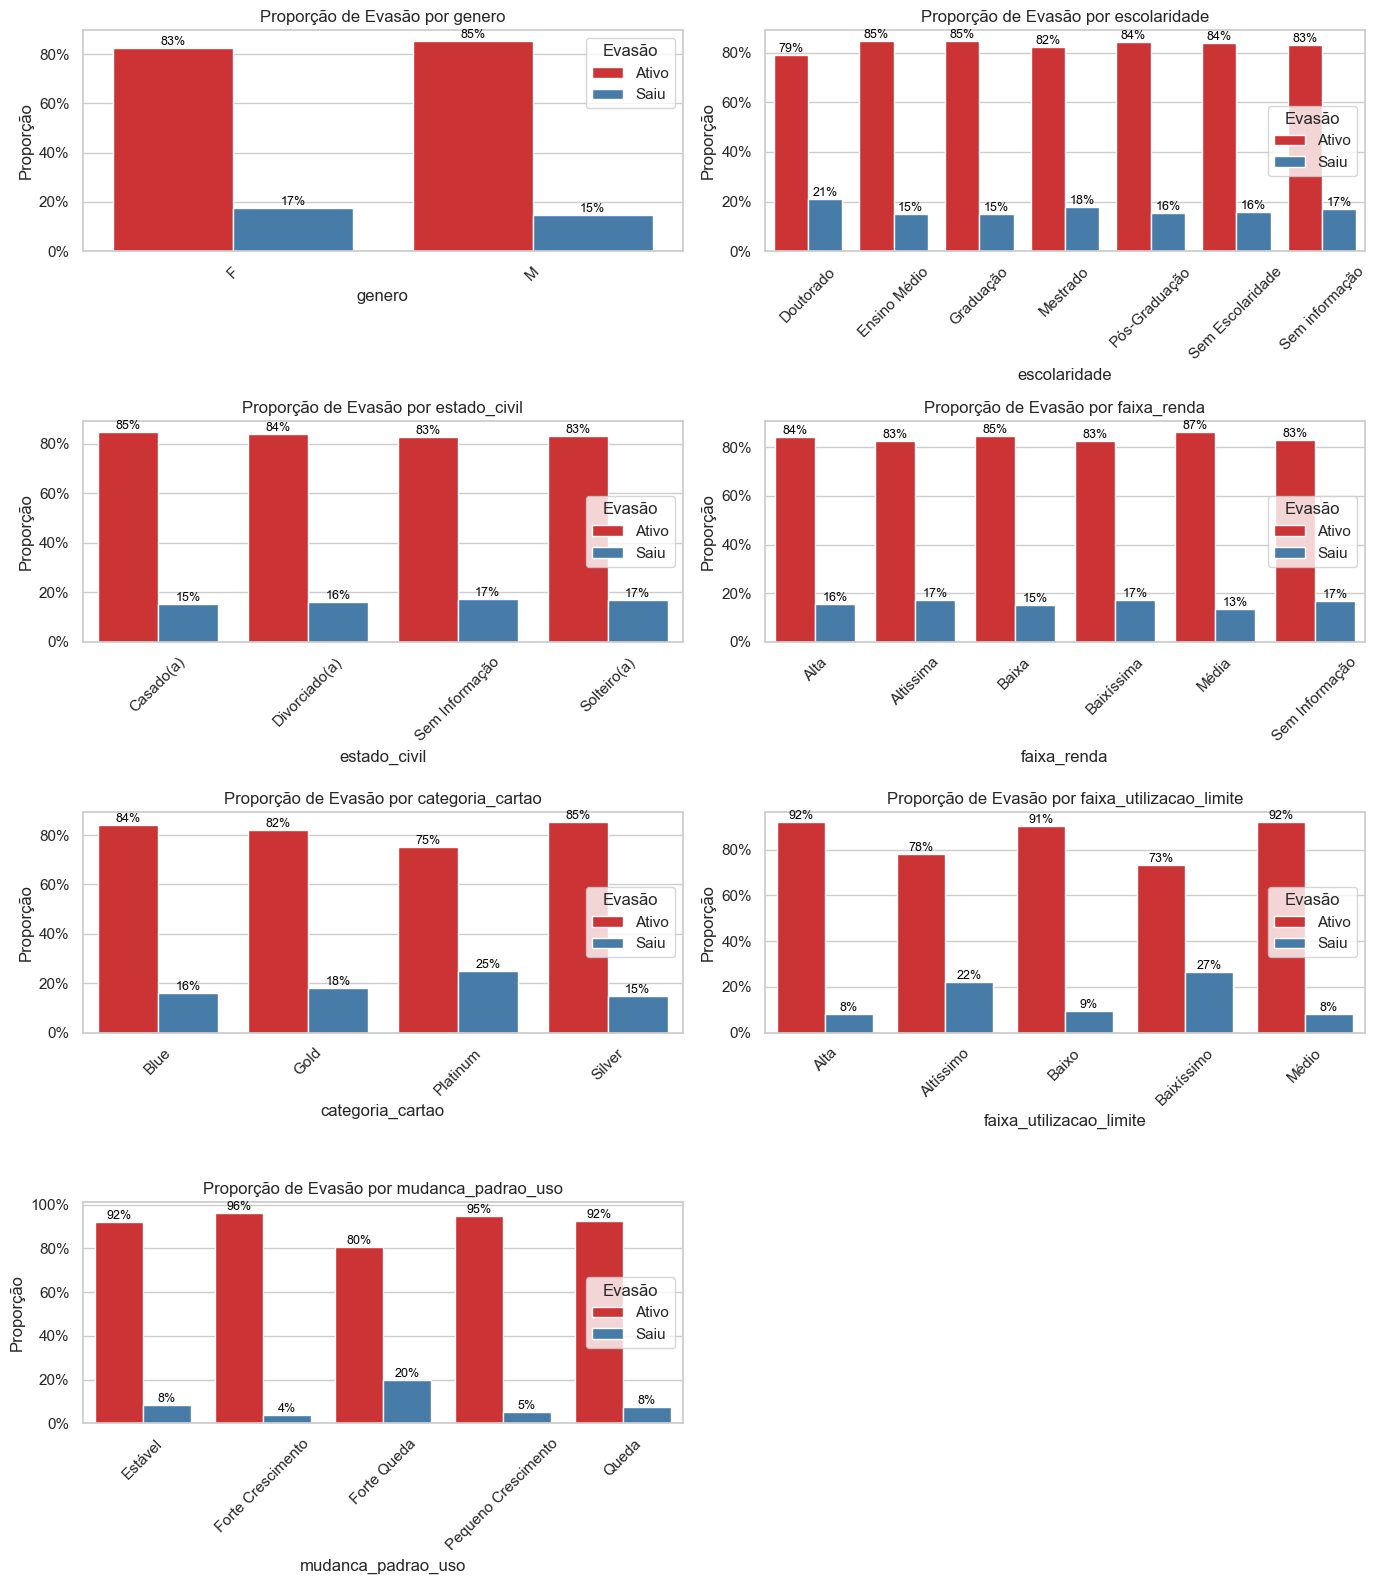

In [19]:
# Criar a grade de subplots
fig, axes = plt.subplots(n_linhas_categoricas, n_colunas, figsize=(14, n_linhas_categoricas * 4))
axes = axes.flatten()

# Loop para criar um gráfico para cada variável
for idx, coluna in enumerate(variaveis_categoricas):
    proporcao = (dados.groupby(coluna)['evasao_cliente']
                      .value_counts(normalize=True)
                      .rename('proporcao')
                      .reset_index())
    sns.barplot(data=proporcao, x=coluna, y='proporcao', hue='evasao_cliente', palette='Set1', ax=axes[idx])
    axes[idx].set_title(f'Proporção de Evasão por {coluna}')
    axes[idx].set_xlabel(coluna)
    axes[idx].set_ylabel('Proporção')
    axes[idx].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0f}%'.format(y * 100)))
    axes[idx].legend(title='Evasão')
    axes[idx].tick_params(axis='x', rotation=45)

    for p in axes[idx].patches:
        height = p.get_height()
        if height > 0.01:
            axes[idx].annotate(f'{height:.0%}',
                               (p.get_x() + p.get_width() / 2., height),
                               ha='center', va='bottom', fontsize=9, color='black')
            
    # Salva cada gráfico individualmente
    fig_2, axes_2 = plt.subplots(figsize=(7, 4))
    sns.barplot(data=proporcao, x=coluna, y='proporcao', hue='evasao_cliente', palette='Set1', ax=axes_2)
    axes_2.set_title(f'Proporção de Evasão por {coluna}')
    axes_2.set_xlabel(coluna)
    axes_2.set_ylabel('Proporção')
    axes_2.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0f}%'.format(y * 100)))
    axes_2.legend(title='Evasão')
    axes_2.tick_params(axis='x', rotation=45)

    # Rótulos no gráficos individuais
    for p in axes_2.patches:
        height = p.get_height()
        if height > 0.01:
            axes_2.annotate(f'{height:.0%}',
                            (p.get_x() + p.get_width() / 2., height),
                            ha='center', va='bottom', fontsize=9, color='black')
    
    fig_2.savefig(f'../figures/grafico_biviariada_categoricas_proporcao_{coluna}.png',dpi=300)
    plt.close(fig_2)

# Remove eixos extras caso existam
for i in range(len(variaveis_categoricas), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()

fig.savefig('../figures/graficos_bivariada_categoricas_proporcao.png', dpi=300)
plt.show()

**Principais Insights dos Gráficos Categóricos - Proporção**

**Perfil Demográfico e Sociocultural**
- Gênero apresenta evasão similar entre homens e mulheres, com diferença pouco expressiva, sugerindo baixo poder preditivo isolado
- Escolaridade revela evasão um pouco maior entre clientes com nível de pós-graduação stricto sensu (Mestrado e Doutorado). Apesar disso, os níveis médios e baixos também mantêm taxas próximas, indicando correlação moderada
- Estado civil mostra que clientes casados possuem a menor taxa de evasão, enquanto solteiros e não informados estão mais associados à saída — — sugerindo que estabilidade conjugal pode favorecer a retenção

**Perfil Financeiro**
- A faixa de renda apresenta pequenas variações, com evasão levemente maior entre clientes de renda média, o que pode indicar algum grau de instabilidade financeira ou expectativas não atendidas
- Categoria do cartão revela um ponto crítico: clientes com cartões Platinum possuem taxa de evasão significativamente superior
- A faixa de utilização do limite mostra relação direta com churn: quanto menor a utilização, maior a evasão, com destaque para a faixa baixíssima, que apresenta a taxa mais alta entre todos os grupos analisados

**Atividade e Engajamento**
- A variável mudança no padrão de uso é uma das mais relevantes: clientes classificados como "Forte Queda" apresentam a maior taxa de evasão, enquanto perfis estáveis ou em crescimento demonstram baixa propensão à saída
- Esse comportamento reflete claramente o nível de engajamento e deve ser monitorado continuamente

**Sinais de Alerta**
- Baixíssima utilização do limite de crédito e queda acentuada no padrão de uso são os principais indicadores de risco.
- Cartões Platinum, embora poucos na base, apresentam taxa de evasão elevada
- Clientes solteiros e com nível superior (Mestrado/Doutorado) apresentam leve tendência à evasão, podendo refletir perfis mais exigentes ou com menor fidelização

### Matriz de Correlação

In [20]:
# Copia do dataset 
dados_corr = dados.copy()

# Removendo a coluna id_cliente
dados_corr.drop(columns='id_cliente', inplace=True)

# Mapeamento para a codificação ordinal das variáveis categóricas ordinais
mapeamentos_corr = {
    'evasao_cliente': {'Ativo': 0, 'Saiu': 1},
    'escolaridade': {'Sem informação': -1, 'Sem Escolaridade': 1, 'Ensino Médio': 2,
                     'Graduação': 3,'Pós-Graduação': 4 ,'Mestrado': 5, 
                     'Doutorado': 6},
    'faixa_renda': {'Sem Informação': -1, 'Baixíssima': 1,'Baixa': 2, 
                    'Média': 3, 'Alta': 4, 'Altíssima': 5},
    'faixa_utilizacao_limite': {'Baixíssimo': 1, 'Baixo': 2, 'Médio': 3, 
                                'Alta': 4, 'Altíssimo': 5},
    'mudanca_padrao_uso': {'Forte Queda': 1, 'Queda': 2, 'Estável': 3,
                           'Pequeno Crescimento': 4, 'Forte Crescimento': 5}    
                    }

# Loop que aplica os mapeamentos 
for coluna, mapa in mapeamentos_corr.items():
    dados_corr[coluna] = dados_corr[coluna].map(mapa)

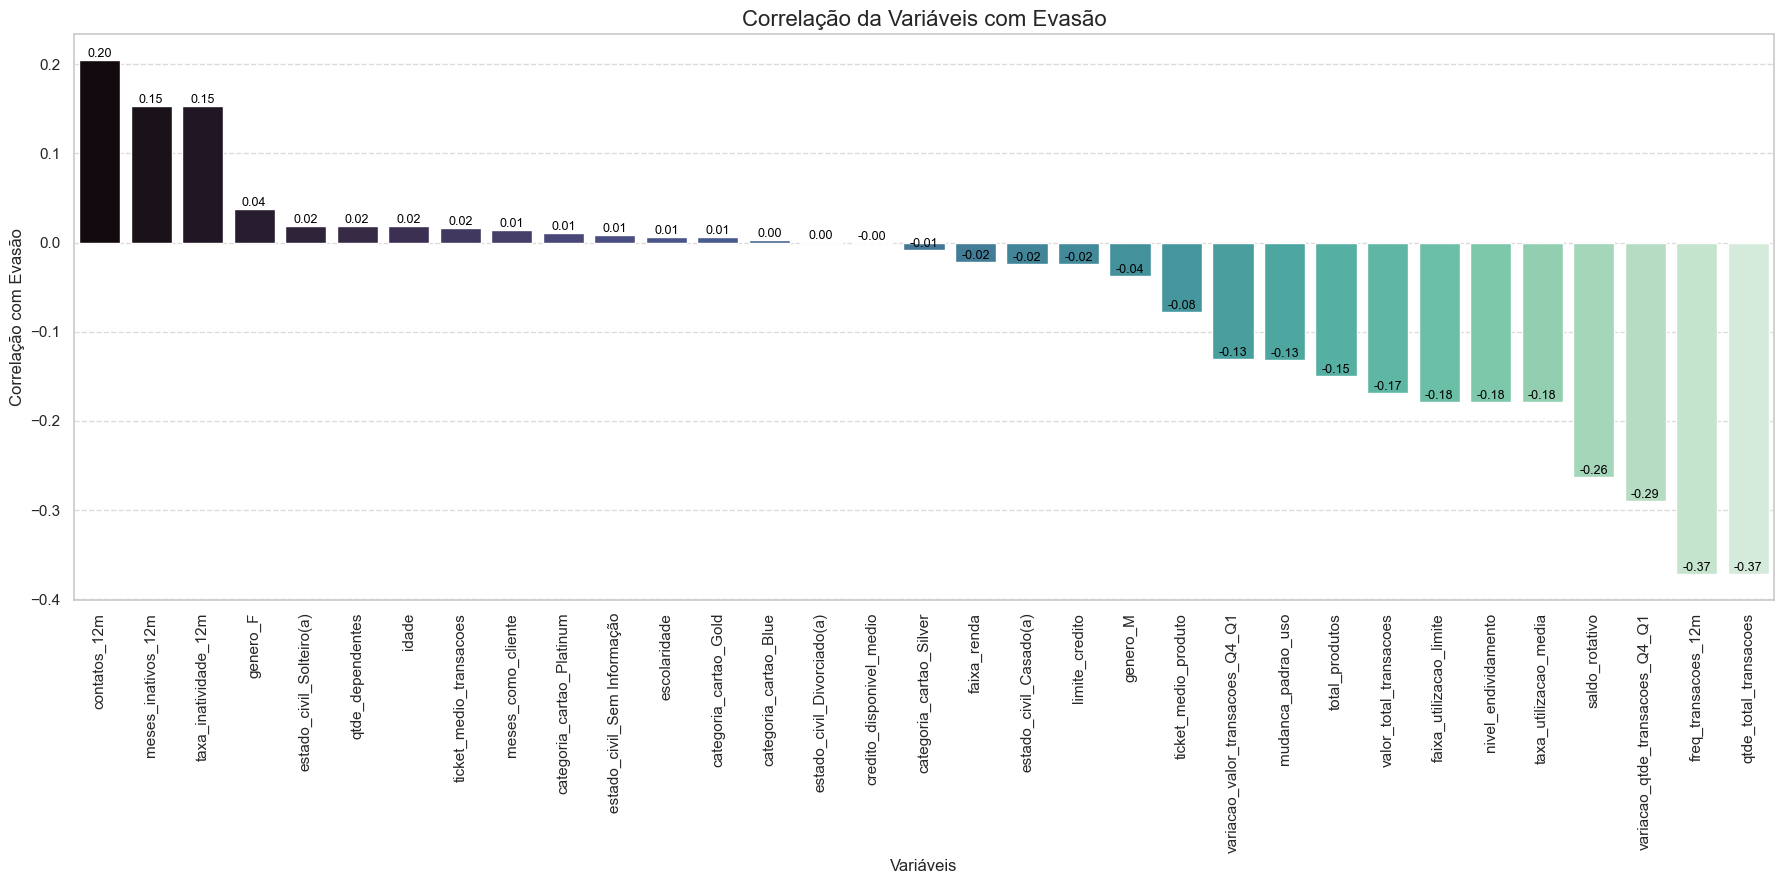

In [21]:
# Gerando dummies
dados_corr = pd.get_dummies(dados_corr,
                            columns=dados_corr.select_dtypes(include='object').columns.tolist(),
                            drop_first=False)

# Calculando a correlação de todas as variáveis com evasao_cliente
correlacoes = dados_corr.corr()[['evasao_cliente']].drop('evasao_cliente')
correlacoes = correlacoes.sort_values('evasao_cliente',ascending=False)

#Visualizando as correlações
plt.figure(figsize=(18,9))
ax = sns.barplot(x=correlacoes.index, y=correlacoes['evasao_cliente'], palette='mako')
plt.title('Correlação da Variáveis com Evasão', fontsize=16)
plt.ylabel('Correlação com Evasão')
plt.xlabel('Variáveis')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionando rótulos de correlação nas barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9, color='black')

plt.tight_layout()

plt.savefig('../figures/correlacao_variaveis_evasao.png', dpi=300)

plt.show()

**Principais Insights da Correlação**

**Correlações Positivas e Negativas**
- As variáveis com maior correlação positiva estão relacionadas à inatividade e baixa interação com o banco, enquanto as com correlação negativa estão associadas a uso frequente e consistente dos serviços bancários
- A distribuição das correlações reflete a natureza do problema: multifatorial e com relações geralmente moderadas

**Interpretação Geral**
- Comportamentos de baixa movimentação financeira, menos transações, maior inatividade e menor utilização do crédito se correlacionam com maior risco de evasão
- Por outro lado, clientes mais ativos, com uso regular dos serviços e menor inatividade, tendem a permanecer mais tempo na base
- Variáveis demográficas apresentam correlação fraca e devem ser vistas como complementares, sem grande poder preditivo quando isoladas

**Força das Correlações**
- A maioria das correlações está abaixo de 0,4 (em valor absoluto), o que é comum em problemas de evasão com múltiplos fatores de influência
- Mesmo correlações moderadas podem ser valiosas quando utilizadas em conjunto com outras variáveis na modelagem

**Sinais de Alerta**
- Aumento da inatividade, redução no número de transações e interação limitada com o banco são os principais sinais associados à evasão
- Variáveis que refletem queda de uso ao longo do tempo também estão negativamente associadas à permanência

### Teste Estatísticos

In [22]:
# Copia do dataset
dados_teste = dados.copy()

# Removendo a coluna id_cliente
dados_teste.drop(columns='id_cliente', inplace=True)

# Mapeamento para a codificação ordinal das variáveis categóricas ordinais
mapeamentos_teste = {
    'evasao_cliente': {'Ativo': 0, 'Saiu': 1},
    'escolaridade': {'Sem informação': -1, 'Sem Escolaridade': 1, 'Ensino Médio': 2,
                     'Graduação': 3,'Pós-Graduação': 4 ,'Mestrado': 5, 
                     'Doutorado': 6},
    'faixa_renda': {'Sem Informação': -1, 'Baixíssima': 1,'Baixa': 2, 
                    'Média': 3, 'Alta': 4, 'Altíssima': 5},
    'faixa_utilizacao_limite': {'Baixíssimo': 1, 'Baixo': 2, 'Médio': 3, 
                                'Alta': 4, 'Altíssimo': 5},
    'mudanca_padrao_uso': {'Forte Queda': 1, 'Queda': 2, 'Estável': 3,
                           'Pequeno Crescimento': 4, 'Forte Crescimento': 5}    
                    }

# Loop que aplica os mapeamentos em cada coluna correspondente do dataset
for coluna, mapa in mapeamentos_teste.items():
    dados_teste[coluna] = dados_teste[coluna].map(mapa)

# Separação das variaveis para os testes 
variavel_alvo = 'evasao_cliente'
variaveis_num_ordinal = ['escolaridade', 'faixa_renda', 'faixa_utilizacao_limite', 'mudanca_padrao_uso']
variaveis_numericas = dados_teste.select_dtypes(include='number').columns.difference(variaveis_num_ordinal + [variavel_alvo]).tolist()
variaveis_categoricas = dados_teste.select_dtypes(include='object').columns.tolist()

In [23]:
print('--- Teste de Mann-Whitney (variáveis numéricas contínuas) ---\n')

significativas_mann = []

for var in variaveis_numericas:
    grupo0 = dados_teste[dados_teste[variavel_alvo] == 0][var]
    grupo1 = dados_teste[dados_teste[variavel_alvo] == 1][var]
    
    stat, p = mannwhitneyu(grupo0, grupo1)
    if p < 0.05:
        significativas_mann.append(var)
    print(f'{var}: p-valor = {p:.4f} {"✔️ Significativo" if p < 0.05 else "❌ Não significativo"}')

--- Teste de Mann-Whitney (variáveis numéricas contínuas) ---

contatos_12m: p-valor = 0.0000 ✔️ Significativo
credito_disponivel_medio: p-valor = 0.0057 ✔️ Significativo
freq_transacoes_12m: p-valor = 0.0000 ✔️ Significativo
idade: p-valor = 0.0781 ❌ Não significativo
limite_credito: p-valor = 0.0000 ✔️ Significativo
meses_como_cliente: p-valor = 0.1237 ❌ Não significativo
meses_inativos_12m: p-valor = 0.0000 ✔️ Significativo
nivel_endividamento: p-valor = 0.0000 ✔️ Significativo
qtde_dependentes: p-valor = 0.0347 ✔️ Significativo
qtde_total_transacoes: p-valor = 0.0000 ✔️ Significativo
saldo_rotativo: p-valor = 0.0000 ✔️ Significativo
taxa_inatividade_12m: p-valor = 0.0000 ✔️ Significativo
taxa_utilizacao_media: p-valor = 0.0000 ✔️ Significativo
ticket_medio_produto: p-valor = 0.0000 ✔️ Significativo
ticket_medio_transacoes: p-valor = 0.5034 ❌ Não significativo
total_produtos: p-valor = 0.0000 ✔️ Significativo
valor_total_transacoes: p-valor = 0.0000 ✔️ Significativo
variacao_qtde_tr

In [24]:
print('--- Teste de Kruskal-Wallis (variáveis ordinais codificadas) ---\n')

significativas_kruskal = []

for var in variaveis_num_ordinal:
    grupo0 = dados_teste[dados_teste[variavel_alvo] == 0][var]
    grupo1 = dados_teste[dados_teste[variavel_alvo] == 1][var]
    
    stat, p = kruskal(grupo0, grupo1)
    if p < 0.05:
        significativas_kruskal.append(var)
    print(f'{var}: p-valor = {p:.4f} {"✔️ Significativo" if p < 0.05 else "❌ Não significativo"}')

--- Teste de Kruskal-Wallis (variáveis ordinais codificadas) ---

escolaridade: p-valor = 0.4633 ❌ Não significativo
faixa_renda: p-valor = nan ❌ Não significativo
faixa_utilizacao_limite: p-valor = 0.0000 ✔️ Significativo
mudanca_padrao_uso: p-valor = 0.0000 ✔️ Significativo


In [25]:
print('--- Teste Z de Proporções (variáveis categóricas binárias) ---\n')

significativas_ztest = []

for var in variaveis_categoricas:
    tabela = pd.crosstab(dados_teste[var], dados_teste[variavel_alvo])
    
    if tabela.shape[0] == 2:
        stat, p = proportions_ztest(count=tabela.iloc[:, 1], nobs=tabela.sum(axis=1))
        if p < 0.05:
            significativas_ztest.append(var)
        print(f'{var}: p-valor = {p:.4f} {"✔️ Significativo" if p < 0.05 else "❌ Não significativo"}')


--- Teste Z de Proporções (variáveis categóricas binárias) ---

genero: p-valor = 0.0002 ✔️ Significativo


In [26]:
print('-- Teste Qui-Quadrado (variáveis categóricas com >2 categorias) ---\n')

significativas_chi2 = []

for var in variaveis_categoricas:
    tabela = pd.crosstab(dados_teste[var], dados_teste[variavel_alvo])
    
    if tabela.shape[0] > 2:
        if (tabela.values >= 5).all():
            stat, p, _, _ = chi2_contingency(tabela)
            if p < 0.05:
                significativas_chi2.append(var)
            print(f'{var}: p-valor = {p:.4f} {"✔️ Significativo" if p < 0.05 else "❌ Não significativo"}')
        else:
            print(f'{var}: ⚠️ Qui-Quadrado não aplicável (valores < 5 por célula)')

-- Teste Qui-Quadrado (variáveis categóricas com >2 categorias) ---

estado_civil: p-valor = 0.1089 ❌ Não significativo
categoria_cartao: p-valor = 0.5252 ❌ Não significativo


In [27]:
# Concatenando as variaveis significativas
variaveis_significativas = significativas_mann + significativas_kruskal + significativas_ztest + significativas_chi2

variaveis_significativas

['contatos_12m',
 'credito_disponivel_medio',
 'freq_transacoes_12m',
 'limite_credito',
 'meses_inativos_12m',
 'nivel_endividamento',
 'qtde_dependentes',
 'qtde_total_transacoes',
 'saldo_rotativo',
 'taxa_inatividade_12m',
 'taxa_utilizacao_media',
 'ticket_medio_produto',
 'total_produtos',
 'valor_total_transacoes',
 'variacao_qtde_transacoes_Q4_Q1',
 'variacao_valor_transacoes_Q4_Q1',
 'faixa_utilizacao_limite',
 'mudanca_padrao_uso',
 'genero']

**Interpretação das Variáveis Significativas**

As variáveis selecionadas mostram que a evasão está fortemente associada a baixa atividade transacional, queda recente no uso dos serviços e engajamento limitado com o crédito. Clientes com menos transações, maior inatividade, menor utilização do limite, e poucos produtos contratados tendem a apresentar maior risco de evasão. Essas variáveis indicam um perfil de relacionamento superficial com o banco

## Modelagem Preditiva

**Escolha dos Modelos Preditivos**
 
Neste case, foram selecionados três modelos com características distintas para avaliar o risco de evasão de clientes:

- **Regressão Logística** foi escolhida por ser simples, interpretável e eficiente como modelo base. Ela permite entender com clareza o impacto de cada variável na probabilidade de churn.
- **Random Forest** foi incluído por sua robustez e capacidade de lidar com dados complexos, além de ser eficaz na identificação de padrões não lineares.
- **XGBoost** foi considerado por seu alto desempenho em tarefas de classificação, sendo especialmente útil para capturar padrões mais sutis no comportamento dos clientes.

A escolha final do modelo será feita com base na comparação de desempenho, considerando métricas como AUC, recall e precisão, além da aplicabilidade prática dos resultados no contexto do negócio

### Regressão Logistica

In [28]:
dados_rl = dados[variaveis_significativas + [variavel_alvo]].copy()

# Mapeamento binário
mapeamentos_rl = {'evasao_cliente': {'Ativo': 0, 'Saiu': 1},
                  'genero':{'F':0, 'M': 1}
                 }
# Loop que aplica os mapeamentos 
for coluna, mapa in mapeamentos_rl.items():
    dados_rl[coluna] = dados_rl[coluna].map(mapa)

# Gerando dummies
dados_rl = pd.get_dummies(dados_rl,columns=dados_rl.select_dtypes(include=['object', 'category']).columns,drop_first=True)

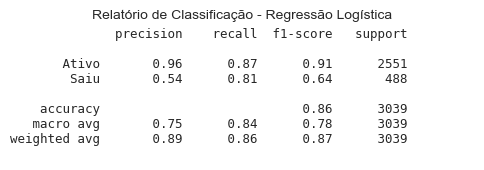

In [29]:
# Separando em X e y
X_rl = dados_rl.drop(columns='evasao_cliente')
y_rl = dados_rl['evasao_cliente']

# Separando numericas e dummies
colunas_numericas = X_rl.select_dtypes(include=['int64', 'float64']).columns
colunas_dummies = X_rl.select_dtypes(exclude=['int64', 'float64']).columns

# Normalizando variaveis numéricas
scaler = StandardScaler()
X_numericas = pd.DataFrame(scaler.fit_transform(X_rl[colunas_numericas]), columns=colunas_numericas)

# Concatenando numericas normalizadas e dummies 
X_rl_final = pd.concat([X_numericas.reset_index(drop=True), X_rl[colunas_dummies].reset_index(drop=True)], axis=1)

# Divisão dos dados (treino e teste)
X_train_rl, X_test_rl, y_train_rl, y_test_rl = train_test_split(X_rl_final, y_rl, test_size=0.3, stratify=y_rl, random_state=42)

# Aplicando SMOTE
smote = SMOTE(random_state=42)
X_train_rl_res, y_train_rl_res = smote.fit_resample(X_train_rl, y_train_rl)

# Treinamento e modelo 
modelo_logistico = LogisticRegression(random_state=42, max_iter=1000)
modelo_logistico.fit(X_train_rl_res,y_train_rl_res)

# Predições no conjunto de teste
y_pred_rl = modelo_logistico.predict(X_test_rl)
y_prob_rl = modelo_logistico.predict_proba(X_test_rl)[:,1]

# Salvando modelo
#joblib.dump(modelo_logistico, '../models/modelo_regressao_logistica.pkl')

# Relatorio de classificação
relatorio = classification_report(y_test_rl,y_pred_rl,target_names=['Ativo','Saiu'])

# Cria uma figura para desenhar o texto
fig, ax = plt.subplots(figsize=(6, 1.5))
ax.axis('off')
plt.text(0, 1, relatorio, fontsize=9, fontfamily='monospace', verticalalignment='top')
plt.title('Relatório de Classificação - Regressão Logística', fontsize=10)
plt.savefig('../figures/relatorio_classificacao_regressao_logistica.png', dpi=300, bbox_inches='tight')
plt.show()

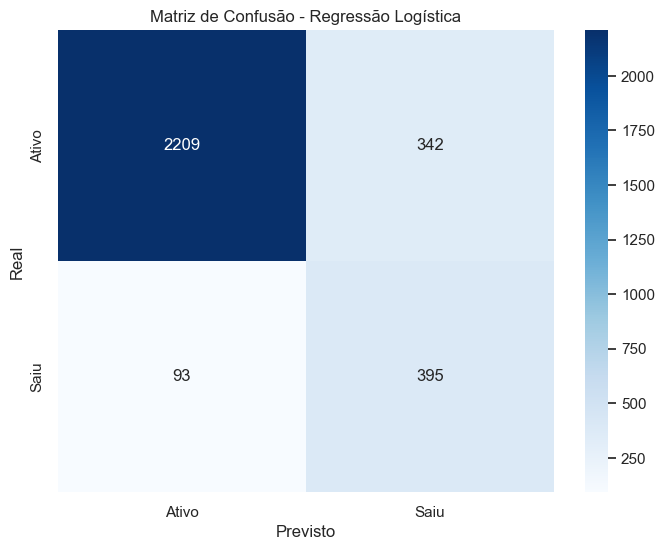

In [30]:
# Matriz de confusão
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test_rl, y_pred_rl), annot=True, fmt='d',cmap='Blues',xticklabels=['Ativo', 'Saiu'], yticklabels=['Ativo', 'Saiu'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Regressão Logística')
plt.savefig('../figures/matriz_confusao_regressao_logistica.png', dpi=300, bbox_inches='tight')
plt.show()

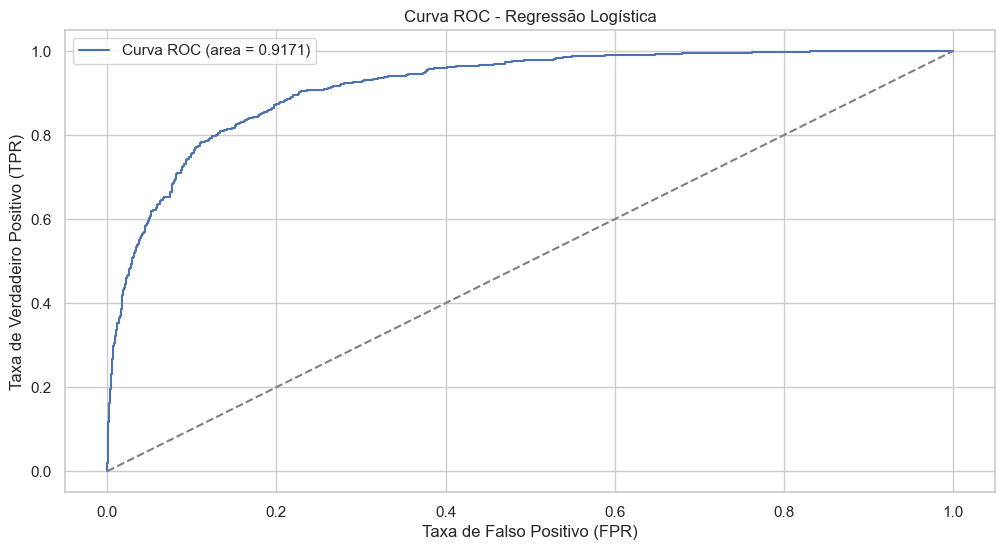

ROC-AUC Score: 0.9171


In [31]:
# Avaliação da curva ROC
roc_auc_rl = roc_auc_score(y_test_rl,y_prob_rl)
fpr_rl, tpr_rl, thresholds = roc_curve(y_test_rl, y_prob_rl)

plt.figure(figsize=(12,6))
plt.plot(fpr_rl, tpr_rl, label=f'Curva ROC (area = {roc_auc_rl:.4f})')
plt.plot([0, 1],[0, 1], linestyle='--', color='gray')
plt.xlabel('Taxa de Falso Positivo (FPR)')
plt.ylabel('Taxa de Verdadeiro Positivo (TPR)')
plt.title('Curva ROC - Regressão Logística')
plt.legend()
plt.savefig('../figures/curva_roc_regressao_logistica.png', dpi=300, bbox_inches='tight')
plt.show()

# ROC-AUC Score
print(f'ROC-AUC Score: {roc_auc_rl:.4f}')

**Resultados da Regressão Logística**

**Metricas principais**
- **Precisão (Precision):** Quando o modelo prevê que um cliente vai evadir, ele acerta 54% das vezes
- **Recall:**  O modelo identifica 81% dos clientes que realmente evadem
- **F1-Score:** Medida balancedada entre precisão e recall, indicando um desempenho moderado na decção das evasoes
- **Acurácia Geral:** O modelo classifica corretamente 86% dos clientes (tanto ativos quanto evadidos)

**Matriz de Confusão**
- **Verdadeiros Negativos (TN):** 2209 clientes corretamente classificados como “Ativo”
- **Falsos Positivos (FP):** 342 clientes erroneamente classificados como “Saiu”.
- **Falsos Negativos (FN):** 93 clientes que evadiram, mas o modelo não detectou.
- **Verdadeiros Positivos (TP):** 395 clientes corretamente identificados como “Saiu”

**Curva ROC**
- O modelo tem alta capacidade de diferenciar clientes ativos dos que evadiram

**Conclusões**

- A Regressão Logística demonstrou bom desempenho, com destaque para o recall elevado (81%) na detecção de clientes que evadiram — uma métrica crítica quando o objetivo é reduzir a perda de clientes
- No entanto, o modelo apresentou baixa precisão (54%) nessa mesma classe, indicando um número considerável de falsos positivos (clientes ativos classificados como evadidos)

### Random Forest

In [32]:
dados_rf = dados[variaveis_significativas + [variavel_alvo]].copy()

mapeamentos_rf = {'evasao_cliente': {'Ativo': 0, 'Saiu': 1},
                  'genero': {'F':0, 'M': 1},
                  'faixa_utilizacao_limite': {'Baixíssimo': 1, 'Baixo': 2, 'Médio': 3, 
                                              'Alta': 4, 'Altíssimo': 5},
                  'mudanca_padrao_uso': {'Forte Queda': 1, 'Queda': 2, 'Estável': 3,
                                         'Pequeno Crescimento': 4, 'Forte Crescimento': 5}   
                  }


for col, mapa in mapeamentos_rf.items():
    dados_rf[col] = dados_rf[col].map(mapa)

In [33]:
# Separando em X e y 
X_rf = dados_rf.drop(columns='evasao_cliente')
y_rf = dados_rf['evasao_cliente']

# Divisao dos dados (treino e teste)
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.3, stratify=y_rf, random_state=42)

# Aplicando SMOTE
smote_rf = SMOTE(random_state=42)
X_train_rf_res, y_train_rf_res = smote_rf.fit_resample(X_train_rf, y_train_rf)

# Modelo base 
rf_base = RandomForestClassifier()

# Grade de hiperparâmentros 
param_dist = {
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='roc_auc',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Treinando modelo
random_search_rf.fit(X_train_rf_res, y_train_rf_res)

# Modelo otimizado escolhido
best_rf_model = random_search_rf.best_estimator_
print('Melhores parâmetros encontrados: \n')
print(random_search_rf.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Melhores parâmetros encontrados: 

{'n_estimators': 250, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}


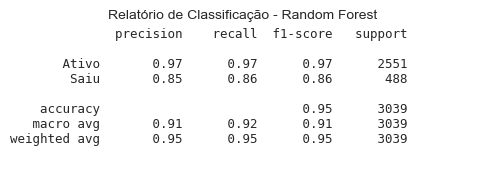

In [34]:
# Predições no conjunto de  teste 
y_pred_rf = best_rf_model.predict(X_test_rf)
y_prob_rf = best_rf_model.predict_proba(X_test_rf)[:, 1]

# Salvando modelo
#joblib.dump(best_rf_model, '../models/modelo_random_forest_otimizado.pkl')

# Relatorio de classificação
relatorio_rf = classification_report(y_test_rf, y_pred_rf, target_names=['Ativo','Saiu'])

# Cria uma figura para desenhar o texto
fig, ax = plt.subplots(figsize=(6, 1.5))
ax.axis('off')
plt.text(0, 1, relatorio_rf, fontsize=9, fontfamily='monospace', verticalalignment='top')
plt.title('Relatório de Classificação - Random Forest', fontsize=10)
plt.savefig('../figures/relatorio_classificacao_random_forest.png', dpi=300, bbox_inches='tight')
plt.show()

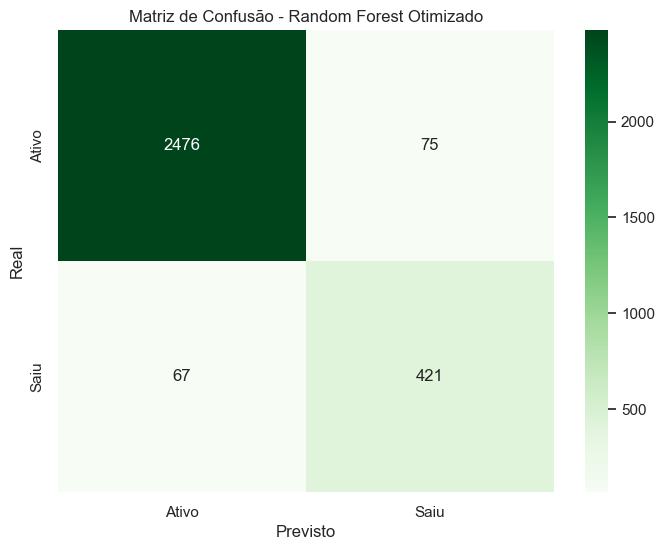

In [35]:
# Matriz de confusão
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test_rf, y_pred_rf), annot=True, fmt='d',cmap='Greens',xticklabels=['Ativo', 'Saiu'], yticklabels=['Ativo', 'Saiu'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Random Forest Otimizado')
plt.savefig('../figures/matriz_confusao_random_forest.png', dpi=300, bbox_inches='tight')
plt.show()

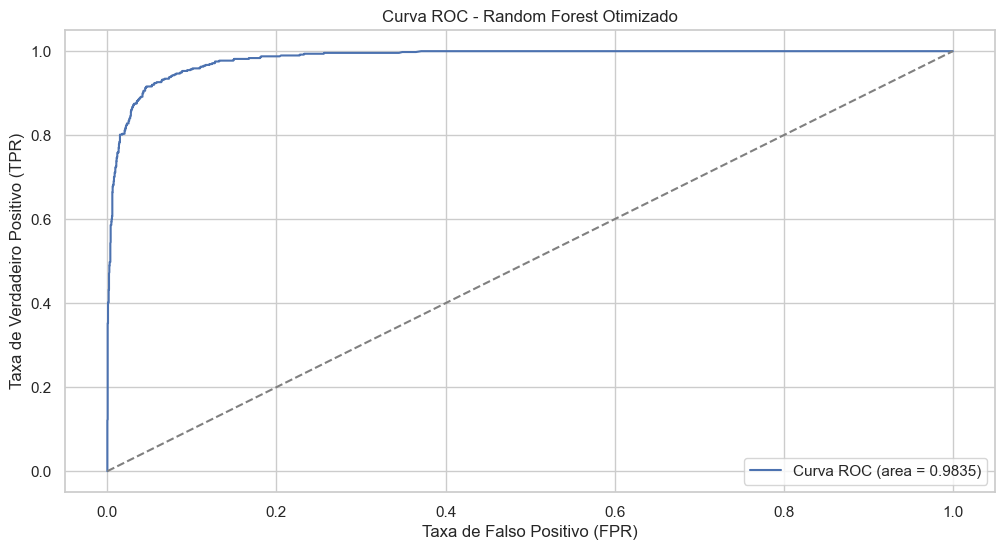

ROC-AUC Score: 0.9835


In [36]:
# Avaliação da curva ROC
roc_auc_rf = roc_auc_score(y_test_rf,y_prob_rf)
fpr_rf, tpr_rf, thresholds = roc_curve(y_test_rf, y_prob_rf)

plt.figure(figsize=(12,6))
plt.plot(fpr_rf, tpr_rf, label=f'Curva ROC (area = {roc_auc_rf:.4f})')
plt.plot([0, 1],[0, 1], linestyle='--', color='gray')
plt.xlabel('Taxa de Falso Positivo (FPR)')
plt.ylabel('Taxa de Verdadeiro Positivo (TPR)')
plt.title('Curva ROC - Random Forest Otimizado')
plt.legend()
plt.savefig('../figures/curva_roc_random_forest.png', dpi=300, bbox_inches='tight')
plt.show()

# ROC-AUC Score
print(f'ROC-AUC Score: {roc_auc_rf:.4f}')

**Resultados do Random Forest**

**Metricas principais**
- **Precisão (Precision):** Quando o modelo prevê que um cliente vai evadir, ele acerta 85% das vezes 
- **Recall:** O modelo identifica 86% dos clientes que realmente evadem,
- **F1-Score:**  Mostra um bom equilíbrio entre precisão e recall, confirmando a robustez do modelo
- **Acurácia Geral:** Classifica corretamente 95% dos clientes (alta confiabilidade nas previsões gerais).

**Matriz de Confusão**
- **Verdadeiros Negativos (TN):** 2478 clientes corretamente classificados como “Ativo”
- **Falsos Positivos (FP):** 73 clientes ativos classificados erroneamente como “Saiu”
- **Falsos Negativos (FN):** 67 clientes que evadiram, mas o modelo não detectou
- **Verdadeiros Positivos (TP):** 421 clientes corretamente classificados como “Saiu”

**Curva ROC**
- O modelo tem alta capacidade de diferenciar clientes ativos dos que evadiram
- Supera significamente o resultado da Regressão Logística

**Conclusões**
- O modelo Random Forest Otimizado apresentou desempenho superior à Regressão Logística, com destaque para métricas mais elevadas de acurácia, recall e F1-score
- O modelo registrou menor número de falsos negativos (clientes que evadiram e não foram detectados), o que é essencial para reduzir a perda de clientes
- O Random Forest também demonstrou robustez ao lidar com dados desbalanceados e ruídos, além de capturar relações não lineares, tolerar valores extremos 

### XGBoost 

In [37]:
dados_xgb = dados[variaveis_significativas + [variavel_alvo]].copy()

mapeamentos_xgb = {'evasao_cliente': {'Ativo': 0, 'Saiu': 1},
                  'genero': {'F':0, 'M': 1},
                  'faixa_utilizacao_limite': {'Baixíssimo': 1, 'Baixo': 2, 'Médio': 3, 
                                              'Alta': 4, 'Altíssimo': 5},
                  'mudanca_padrao_uso': {'Forte Queda': 1, 'Queda': 2, 'Estável': 3,
                                         'Pequeno Crescimento': 4, 'Forte Crescimento': 5}   
                  }


for coluna, mapa in mapeamentos_rf.items():
    dados_xgb[coluna] = dados_xgb[coluna].map(mapa)

In [38]:
# Separando em X e y
X_xgb = dados_xgb.drop(columns='evasao_cliente')
y_xgb = dados_xgb['evasao_cliente']

# Divisao dos dados (treino e teste)
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_xgb,y_xgb, test_size=0.3, stratify=y_xgb, random_state=42)

# Aplicando SMOTE
smote_xgb = SMOTE(random_state=42)
X_train_xgb_res, y_train_xgb_res = smote_xgb.fit_resample(X_train_xgb,y_train_xgb)

# Modelo base 
xgb_base = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Grade de hiperparâmentros 
param_dist_xgb = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'subsample': [0.6, 0.7, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'min_child_weight': [1, 3, 5, 7]
}

# RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist_xgb,
    n_iter=50,
    cv=5,
    scoring='roc_auc',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Treinando modelo
random_search_xgb.fit(X_train_xgb_res, y_train_xgb_res)

# Modelo otimizado escolhido
best_xgb_model = random_search_xgb.best_estimator_
print('Melhores parâmetros encontrados: \n')
print(random_search_xgb.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Melhores parâmetros encontrados: 

{'subsample': 0.8, 'n_estimators': 150, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.15, 'gamma': 0.3, 'colsample_bytree': 0.6}


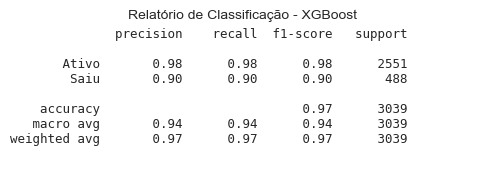

In [39]:
# Predições no conjunto de  teste 
y_pred_xgb = best_xgb_model.predict(X_test_xgb)
y_prob_xgb = best_xgb_model.predict_proba(X_test_xgb)[:, 1]

# Relatorio de classificação
relatorio_xgb = classification_report(y_test_xgb,y_pred_xgb,target_names=['Ativo','Saiu'])

# Salvando modelo
#joblib.dump(best_xgb_model,'../models/modelo_xgboost_otimizado.pkl')

# Cria uma figura para desenhar o texto
fig, ax = plt.subplots(figsize=(6, 1.5))
ax.axis('off')
plt.text(0, 1, relatorio_xgb, fontsize=9, fontfamily='monospace', verticalalignment='top')
plt.title('Relatório de Classificação - XGBoost', fontsize=10)
plt.savefig('../figures/relatorio_classificacao_xgboost.png', dpi=300, bbox_inches='tight')
plt.show()


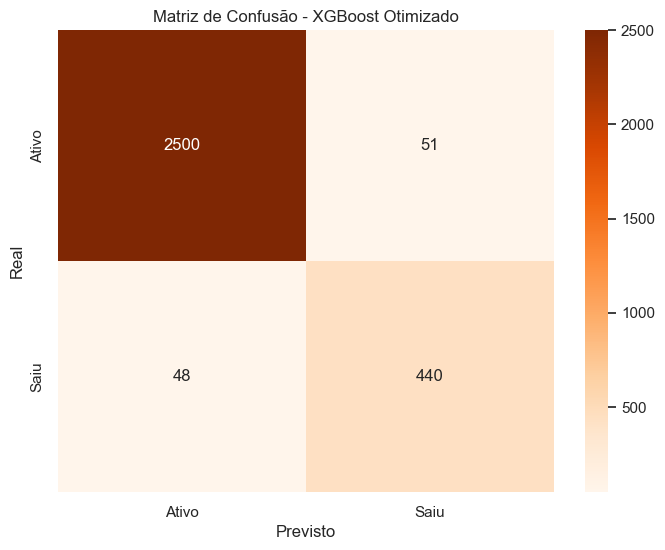

In [40]:
# Matriz de confusão
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test_xgb, y_pred_xgb), annot=True, fmt='d',cmap='Oranges',xticklabels=['Ativo', 'Saiu'], yticklabels=['Ativo', 'Saiu'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - XGBoost Otimizado')
plt.savefig('../figures/matriz_confusao_xgboost.png', dpi=300, bbox_inches='tight')
plt.show()


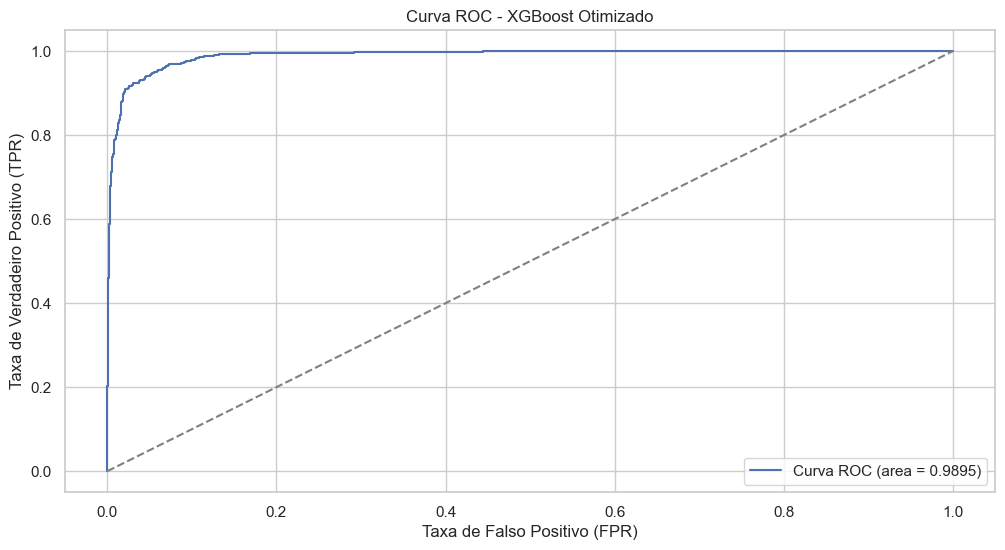

ROC-AUC Score: 0.9895


In [41]:
# Avaliação da curva ROC
roc_auc_xgb = roc_auc_score(y_test_xgb,y_prob_xgb)
fpr_xgb, tpr_xgb, thresholds = roc_curve(y_test_xgb, y_prob_xgb)

plt.figure(figsize=(12,6))
plt.plot(fpr_xgb, tpr_xgb, label=f'Curva ROC (area = {roc_auc_xgb:.4f})')
plt.plot([0, 1],[0, 1], linestyle='--', color='gray')
plt.xlabel('Taxa de Falso Positivo (FPR)')
plt.ylabel('Taxa de Verdadeiro Positivo (TPR)')
plt.title('Curva ROC - XGBoost Otimizado')
plt.legend()
plt.savefig('../figures/curva_roc_xgboost.png', dpi=300, bbox_inches='tight')
plt.show()


# ROC-AUC Score
print(f'ROC-AUC Score: {roc_auc_xgb:.4f}')

**Resultados do XGBoost**

**Métricas principais**
- **Precisão (Precision):** Quando o modelo prevê que um cliente vai evadir, ele acerta 90% das vezes
- **Recall:** O modelo identifica 90% dos clientes que realmente evadem
- **F1-Score:** Mostra um ótimo equilíbrio entre precisão e recall, confirmando a robustez do modelo
- **Acurácia Geral:** Classifica corretamente 97% dos clientes (alta confiabilidade nas previsões gerais)

**Matriz de Confusão**
- **Verdadeiros Negativos (TN):** 2500 clientes corretamente classificados como “Ativo”
- **Falsos Positivos (FP):** 51 clientes ativos classificados erroneamente como “Saiu”
- **Falsos Negativos (FN):** 48 clientes que evadiram, mas o modelo não detectou
- **Verdadeiros Positivos (TP):** 440 clientes corretamente classificados como “Saiu”

**Curva ROC**
- O modelo tem excelente capacidade de diferenciação entre clientes ativos e evadidos
- A área sob a curva ROC foi de 0.9895, superando todos os modelos anteriores

**Conclusões**
- O modelo XGBoost Otimizado demonstrou excelente desempenho, com recall e precisão equilibrados (90%) na detecção de clientes que evadiram 
- Além disso, obteve alta acurácia geral (97%) e um valor elevado de área sob a curva ROC (0.9895), indicando excelente capacidade discriminativa
- A matriz de confusão revelou baixo número de falsos negativos (48), o que reforça a confiabilidade do modelo na identificação correta de clientes em risco de evasão

## Avaliação do Modelo

Com base na performance técnica e nos indicadores apresentados, o modelo XGBoost Otimizado se mostra altamente eficaz e confiável para ser utilizado em ambientes reais de tomada de decisão, auxiliando equipes comerciais e de retenção na identificação proativa de clientes em risco de evasão, possibilitando ações direcionadas com maior assertividade

### Importancia das variáveis

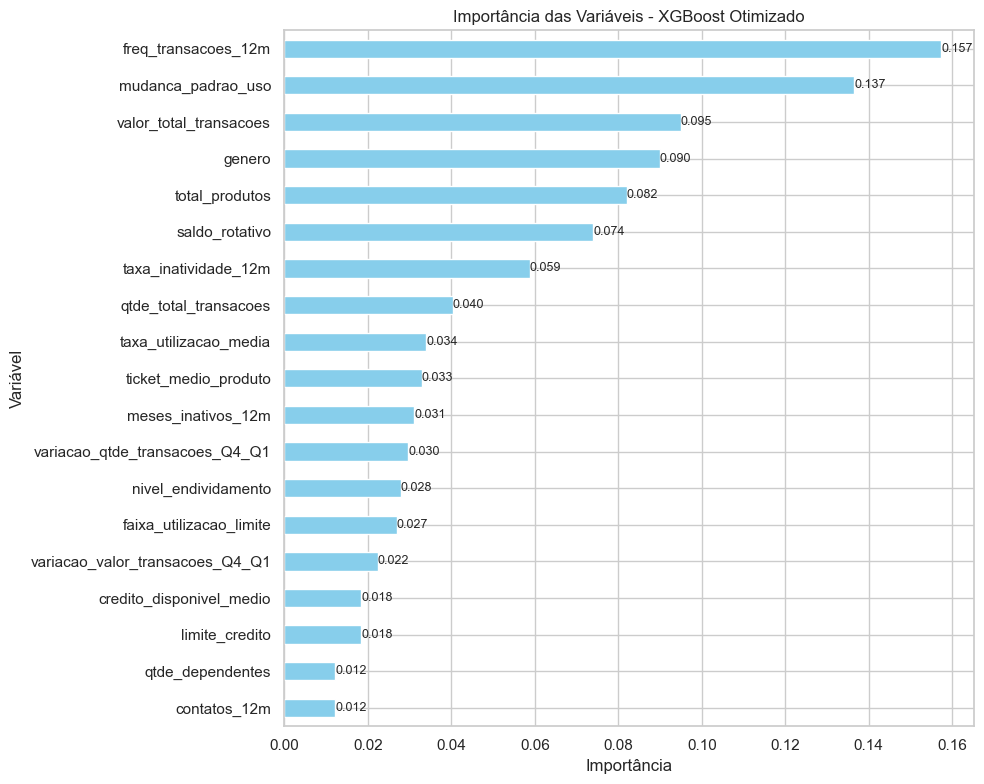

In [42]:
# Obtendo as importancias
importancias = best_xgb_model.feature_importances_

# Cria um grafico 
serie_importancia  = pd.Series(importancias,index=X_xgb.columns).sort_values()

# Plot
plt.figure(figsize=(10, 8))
ax = serie_importancia.plot(kind='barh', color='skyblue')
plt.title('Importância das Variáveis - XGBoost Otimizado')
plt.xlabel('Importância')
plt.ylabel('Variável')

# Adiciona rótulos em cada barra
for i, (valor, nome) in enumerate(zip(serie_importancia, serie_importancia.index)):
    plt.text(valor, i, f'{valor:.3f}', va='center', fontsize=9)

plt.tight_layout()

plt.savefig('../figures/importancia_variaveis_xgboost.png', dpi=300, bbox_inches='tight')

plt.show()

O modelo identificou como principais preditores de evasão a frequência de transações nos últimos 12 meses, mudanças no padrão de uso e o valor total transacionado. Esses fatores refletem diretamente o nível de engajamento do cliente com o banco.

Variáveis como número de produtos, saldo rotativo, tempo de inatividade e utilização de limite também influenciaram o modelo, indicando sinais de desinteresse ou baixo relacionamento.

Outras variáveis, como limite de crédito, crédito disponível e quantidade de dependentes, tiveram menor impacto individual, mas ajudam a compor o perfil de risco.

### SHAP

In [43]:
# Explicador com base no modelo XGBoost
explainer = shap.TreeExplainer(best_xgb_model)

# Calcula os valores SHAP para o conjunto de teste
shap_values = explainer.shap_values(X_test_xgb)

# Gráfico resumido com a contribuição de cada variável
shap.summary_plot(shap_values, X_test_xgb, show=False)

# Salvar a figura corretamente
plt.savefig('../figures/shap_summary_plot.png', dpi=300, bbox_inches='tight')
plt.show
plt.close()


**Interpretação dos SHAP Values – XGBoost Otimizado**

- O gráfico SHAP mostra como cada variável impacta individualmente a previsão de evasão
- Clientes com baixa frequência de transações nos últimos 12 meses influenciam fortemente para a previsão de evasão, enquanto alta frequência reduz esse risco
- Menor valor total transacionado, alta taxa de inatividade e saldo rotativo elevado também aumentam a chance de evasão
- Já alta variação positiva no volume de transações e uso consistente de produtos contribuem para a permanência do cliente
- Variáveis como gênero, total de contatos e limite de crédito têm impacto menor, mas ajudam a ajustar o risco previsto

### Projeção de Evasão

In [44]:
# Gera o relatório de classificação e retorna como dicionário
relatorio_xgb = classification_report(y_test_xgb, y_pred_xgb, output_dict=True)

# Extrai o valor de recall representa proporção de clientes que evadiram e foram corretamente identificados
recall_xgb = relatorio_xgb['1']['recall'] 

# Define a taxa atual de churn observada no negócio
taxa_evasao_atual = 0.16

# Define a eficiência da ação de retenção (ex: 50% dos clientes abordados permanecem)
eficiencia_acao = 0.5

# Calcula a nova taxa de churn ajustada, considerando a retenção parcial dos clientes detectados
evasao_ajustado = taxa_evasao_atual - (taxa_evasao_atual * recall_xgb * eficiencia_acao)

print(f'Previsão da taxa de evasão ajustada: {round(evasao_ajustado*100,2)}%')

Previsão da taxa de evasão ajustada: 8.79%


**Conclusão**

Com base no recall do modelo XGBoost (90%) e considerando que 50% dos clientes abordados seriam retidos, a taxa de evasão projetada cai de 16% para 8,79%. Isso demonstra o potencial do modelo em reduzir pela metade a perda de clientes, mesmo com ações de retenção de eficiência moderada

## Tratamento final e salvamentos

In [45]:
# Salvando Modelos 
joblib.dump(modelo_logistico, '../models/modelo_regressao_logistica.pkl')
joblib.dump(best_rf_model, '../models/modelo_random_forest_otimizado.pkl')
joblib.dump(best_xgb_model,'../models/modelo_xgboost_otimizado.pkl')

['../models/modelo_xgboost_otimizado.pkl']

In [46]:
dados_final = dados.copy()

mapeamentos= {'evasao_cliente': {'Ativo': 0, 'Saiu': 1},
                  'genero': {'F':0, 'M': 1},
                  'faixa_utilizacao_limite': {'Baixíssimo': 1, 'Baixo': 2, 'Médio': 3, 
                                              'Alta': 4, 'Altíssimo': 5},
                  'mudanca_padrao_uso': {'Forte Queda': 1, 'Queda': 2, 'Estável': 3,
                                         'Pequeno Crescimento': 4, 'Forte Crescimento': 5}   
                  }


for col, mapa in mapeamentos.items():
    dados_final[col] = dados_final[col].map(mapa)

X_final = dados_final[variaveis_significativas]

dados_final['score_risco_evasao'] = best_xgb_model.predict_proba(X_final)[:, 1]

# Dicionário reverso para restaurar os rótulos
mapeamentos_reversos = {'evasao_cliente': {0: 'Ativo', 1: 'Saiu'},
                        'genero': {0: 'F', 1: 'M'},
                        'faixa_utilizacao_limite': {1: 'Baixíssimo', 2: 'Baixo', 3: 'Médio',
                                                    4: 'Alta', 5: 'Altíssimo'},
                        'mudanca_padrao_uso': {1: 'Forte Queda', 2: 'Queda', 3: 'Estável',
                                               4: 'Pequeno Crescimento', 5: 'Forte Crescimento'}
                        }

# Aplica reversão apenas se os valores forem numéricos
for col, mapa in mapeamentos_reversos.items():
    if dados_final[col].dtype in ['int64', 'float64']:
        dados_final[col] = dados_final[col].map(mapa)


def classificar_risco(prob, evasao_real):
    if evasao_real == 'Saiu':
        return 'Saiu'
    elif prob < 0.1:
        return 'Baixíssimo risco'
    elif prob < 0.25:
        return 'Baixo risco'
    elif prob < 0.5:
        return 'Médio risco'
    elif prob < 0.75:
        return 'Alto risco'
    else:
        return 'Altíssimo risco'

dados_final['categoria_risco'] = dados_final.apply(lambda row: classificar_risco(row['score_risco_evasao'], row['evasao_cliente']), axis=1)

In [47]:
# Salvando base final
dados_final.to_csv('../data/base_final_risco_score.csv', index=False)
dados_final

id_cliente evasao_cliente  idade genero  qtde_dependentes  \
0       768805383          Ativo     45      M                 3   
1       818770008          Ativo     49      F                 5   
2       713982108          Ativo     51      M                 3   
3       769911858          Ativo     40      F                 4   
4       709106358          Ativo     40      M                 3   
...           ...            ...    ...    ...               ...   
10122   772366833          Ativo     50      M                 2   
10123   710638233           Saiu     41      M                 2   
10124   716506083           Saiu     44      F                 1   
10125   717406983           Saiu     30      M                 2   
10126   714337233           Saiu     43      F                 2   

           escolaridade    estado_civil faixa_renda categoria_cartao  \
0          Ensino Médio       Casado(a)       Média             Blue   
1         Pós-Graduação     Solteiro(a)  Baixíssima             Blue   
2         Pós-Graduação       Casado(a)        Alta             Blue   
3          Ensino Médio  Sem Informação  Baixíssima             Blue   
4      Sem Escolaridade       Casado(a)       Média             Blue   
...                 ...             ...         ...              ...   
10122     Pós-Graduação     Solteiro(a)       Baixa             Blue   
10123    Sem informação   Divorciado(a)       Baixa             Blue   
10124      Ensino Médio       Casado(a)  Baixíssima             Blue   
10125     Pós-Graduação  Sem Informação       Baixa             Blue   
10126     Pós-Graduação       Casado(a)  Baixíssima           Silver   

       meses_como_cliente  ...  taxa_utilizacao_media  taxa_inatividade_12m  \
0                      39  ...                  0.061              0.083333   
1                      44  ...                  0.105              0.083333   
2                      36  ...                  0.000              0.083333   
3                      34  ...                  0.760              0.333333   
4                      21  ...                  0.000              0.083333   
...                   ...  ...                    ...                   ...   
10122                  40  ...                  0.462              0.166667   
10123                  25  ...                  0.511              0.166667   
10124                  36  ...                  0.000              0.250000   
10125                  36  ...                  0.000              0.250000   
10126                  25  ...                  0.189              0.166667   

       freq_transacoes_12m  ticket_medio_transacoes  ticket_medio_produto  \
0                 3.500000                27.238095            228.800000   
1                 2.750000                39.121212            215.166667   
2                 1.666667                94.350000            471.750000   
3                 1.666667                58.550000            390.333333   
4                 2.333333                29.142857            163.200000   
...                    ...                      ...                   ...   
10122             9.750000               132.273504           5158.666667   
10123             5.750000               127.014493           2191.000000   
10124             5.000000               171.516667           2058.200000   
10125             5.166667               135.403226           2098.750000   
10126             5.083333               168.754098           1715.666667   

       nivel_endividamento  faixa_utilizacao_limite  mudanca_padrao_uso  \
0                 0.061224               Baixíssimo   Forte Crescimento   
1                 0.104651                    Baixo   Forte Crescimento   
2                 0.000000               Baixíssimo   Forte Crescimento   
3                 0.759734                     Alta   Forte Crescimento   
4                 0.000000               Baixíssimo   Forte Crescimento   
.